# CS577 Final Project: Heart Attack Risk Prediction

### Contributors: Lucio Beltran, Juan Morales, Hatef Nabili, Estevan Roman, Parisa Zaeri 

## **Import Libraries**

In [1]:
from sklearn.model_selection import StratifiedKFold

from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, roc_curve
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [2]:
heart_data = pd.read_csv("heart_attack_prediction_dataset.csv")


In [3]:
#Inspecting the dimensions of the data set. 
#This is necessary to know how many columns and rows we have in the dataset.
samples, features = heart_data.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

Number Of Samples:  8763
Number Of Features:  26


In [4]:
heart_data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [5]:
#Getting the data types as well as the number of null values.
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
#We are using describe() to understand how the values are distributed in our dataset. 
#We knew this would have a statistical description of all of the numerical values in our dataset. 
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


## **Pre-processing & Data Cleaning**


In [7]:
# These columns are irrelevant to our dataset. We don't need to know the patience ID to generate our model. Patience ID doesn't have any influence in the heart attack risk
# Physical activity will only add redundancy to our model because we already have Exercise hours per week which provides more accurate information about the physical activities of an individual in our dataset. 
# We have the same situation with Hemisphere because we already have Country and  Continent. 
irrelevant_redundant_data = ['Patient ID', 'Physical Activity Days Per Week', 'Hemisphere']
heart_risk = heart_data.drop(columns=irrelevant_redundant_data, axis=1)

heart_risk
# We have to do this because our model was categorizing the Blood Pressure columns wrong. 
#  Blood pressure was a string represented by this format 125/78, making the model think that the values were categorical(Object).
# In reality, the values are indeed numerical, so we created two columns to divide blood pressure into two parts. Systolic data and Diastolic data. 
heart_risk[['Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure']] = heart_risk['Blood Pressure'].str.split('/', expand=True).astype(float)

# Dropping the original 'Blood Pressure' column
heart_risk.drop('Blood Pressure', axis=1, inplace=True)
# Checking if the new columns were added. 
heart_risk

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,6,Argentina,South America,0,158.0,88.0
1,21,Male,389,98,1,1,1,1,1,1.813242,...,4.963459,285768,27.194973,235,7,Canada,North America,0,165.0,93.0
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9.463426,235282,28.176571,587,4,France,Europe,0,174.0,99.0
3,84,Male,383,73,1,1,1,0,1,9.828130,...,7.648981,125640,36.464704,378,4,Canada,North America,0,163.0,100.0
4,66,Male,318,93,1,1,1,1,0,5.804299,...,1.514821,160555,21.809144,231,5,Thailand,Asia,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,10.806373,235420,19.655895,67,7,Thailand,Asia,0,94.0,76.0
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,3.833038,217881,23.993866,617,9,Canada,North America,0,157.0,102.0
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,2.375214,36998,35.406146,527,4,Brazil,South America,1,161.0,75.0
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,0.029104,209943,27.294020,114,8,Brazil,South America,0,119.0,67.0


## **Unique Values**

In [8]:
# Getting the number of our unique values for each variable. 
d = []
u = []
t = []
for col in heart_risk:
    d.append(col)
    u.append(heart_risk[col].nunique())
    t.append(heart_risk[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,Age,int64,73
1,Sex,object,2
2,Cholesterol,int64,281
3,Heart Rate,int64,71
4,Diabetes,int64,2
5,Family History,int64,2
6,Smoking,int64,2
7,Obesity,int64,2
8,Alcohol Consumption,int64,2
9,Exercise Hours Per Week,float64,8763


In [9]:
# We are identifying the types of variables in our dataset. 
binary =[]
categorical = []
numerical = []
continuous = []
discrete = []
for i in range(len(d)):
    if t[i] in ['int64', 'float64']:
        numerical.append(d[i])
        if t[i] == 'float64':
            continuous.append(d[i])
        if t[i] == 'int64' and u[i] > 20:
            discrete.append(d[i])
            
    if t[i] == 'object' or u[i] <= 3:
        categorical.append(d[i])
        if u[i] == 2:
            binary.append(d[i])
# discrete.append('Stress Level')
ordinal = ['Diet', 'Stress Level']
nominal = list(set(categorical) - set(ordinal))


print("Numerical Variables:"+str(numerical))
print()
print("Discrete Variables:"+str(discrete))
print()
print("Continuous Variables:"+str(continuous))
print()
print("Categorical Variables:"+str(categorical))
print()
print("Binary Variables:"+str(binary))
print()
print("Nominal Variables:"+str(nominal))
print()

print("ordinal Variables:"+str(ordinal))
print()


        
    
        

Numerical Variables:['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure']

Discrete Variables:['Age', 'Cholesterol', 'Heart Rate', 'Income', 'Triglycerides']

Continuous Variables:['Exercise Hours Per Week', 'Sedentary Hours Per Day', 'BMI', 'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure']

Categorical Variables:['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Country', 'Continent', 'Heart Attack Risk']

Binary Variables:['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']

Nominal Variables:['Conti

In [10]:
#Checking for missing data
#Luckily there are no null values. 
heart_data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [11]:
#checking for duplicates
heart_data.duplicated().sum()

0

In [12]:
pd.set_option('display.max_columns', None)
heart_risk

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,6,Argentina,South America,0,158.0,88.0
1,21,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,7,Canada,North America,0,165.0,93.0
2,21,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,France,Europe,0,174.0,99.0
3,84,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,4,Canada,North America,0,163.0,100.0
4,66,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,5,Thailand,Asia,0,91.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,Thailand,Asia,0,94.0,76.0
8759,28,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,9,Canada,North America,0,157.0,102.0
8760,47,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,Brazil,South America,1,161.0,75.0
8761,36,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,8,Brazil,South America,0,119.0,67.0


# **Data Exploration and Visualization**

## **Exploring Categorical Data**

#### **Exploring Binary Variables** 

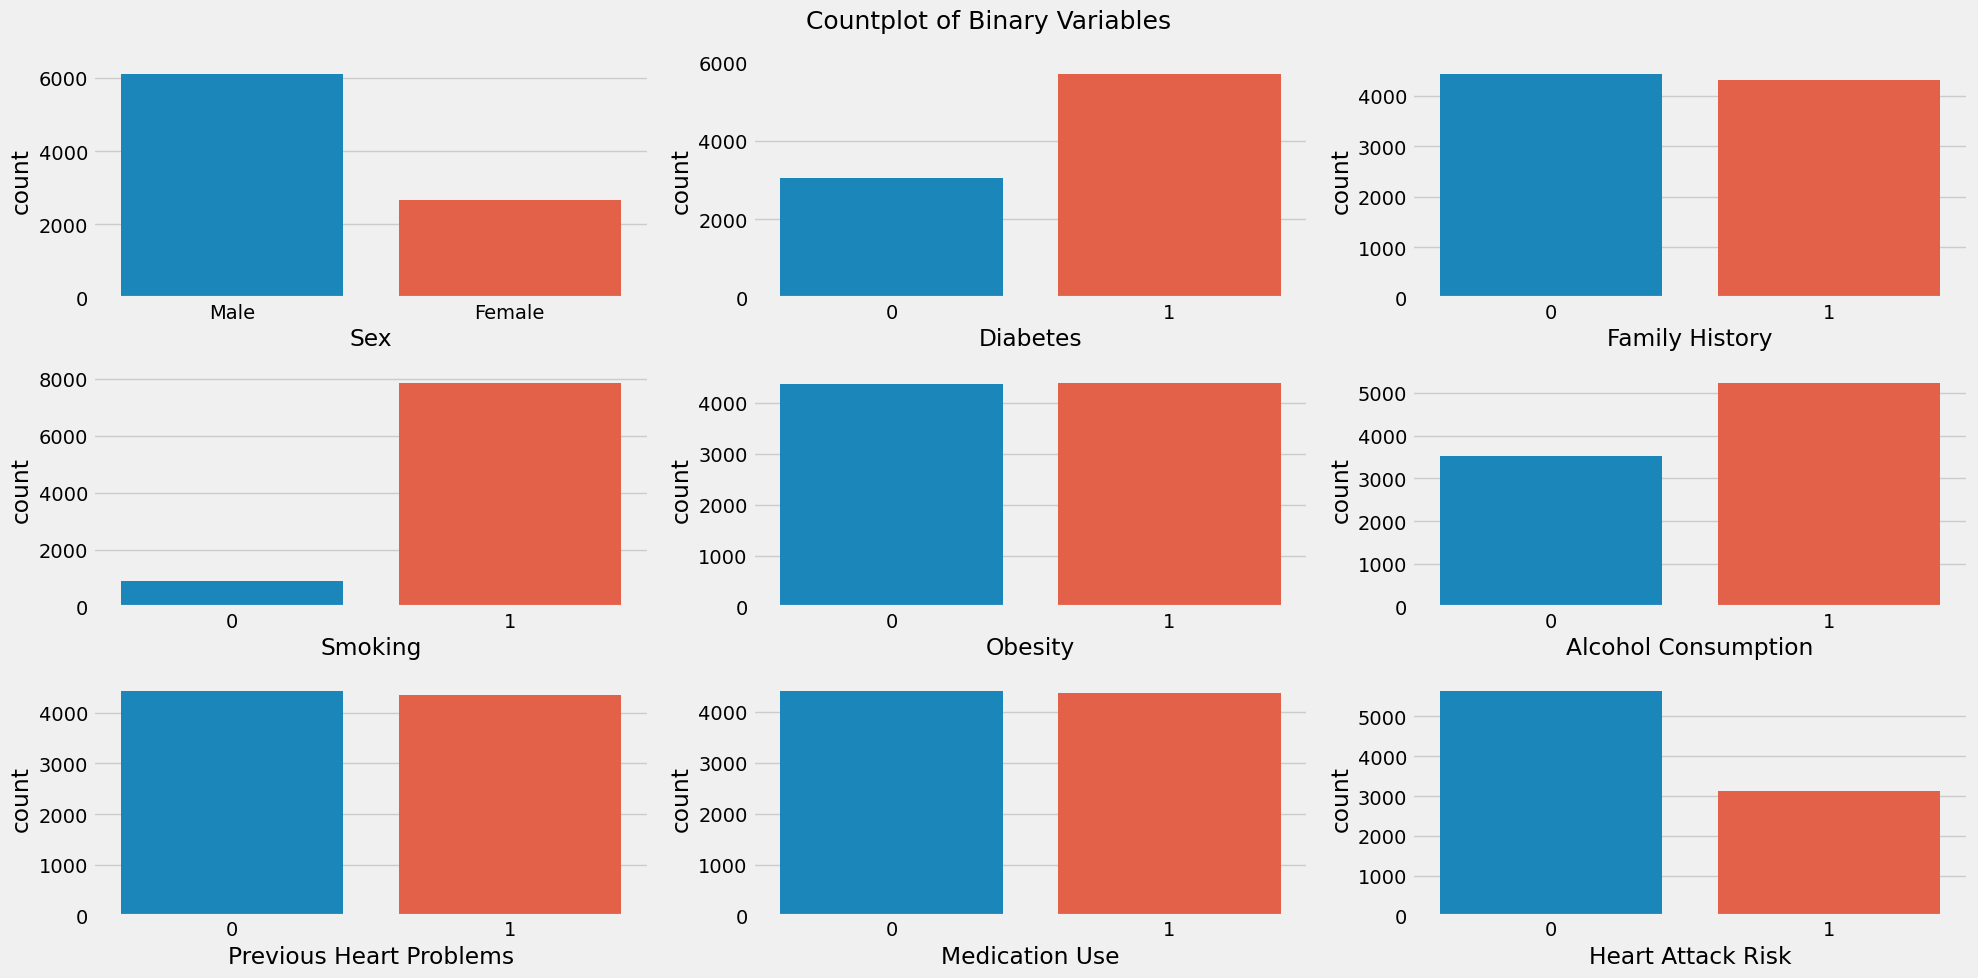

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.suptitle("Countplot of Binary Variables", fontsize=18)
# Loop through each binary categorical variable. 
# binary_vars = ['Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']
for i, var in enumerate(binary, 1):
    # Create a subplot for each variable in a 2 by 2 grid
    plt.subplot(3, 3, i)
    
    # Countplot
    sns.countplot(x=heart_data[var], data=heart_data)
#     plt.title(f'Countplot - {var}')

# Adjust layout
plt.tight_layout()


# Save the figure as an image
plt.savefig('CategoricalCountplots')

# Display the plots
plt.show()

From the visualizations above, we can see that our dataset is imbalanced, as there are almost twice as many samples with a 'Heart Attack Risk' of 1 compared to those with a risk of 0. This imbalance can lead to issues in classification tasks. Furthermore, the number of samples indicating 'Smoking' as 0 is fewer than those indicating it as 1...

### **Exploring Categorical Variables with more than two possible values**

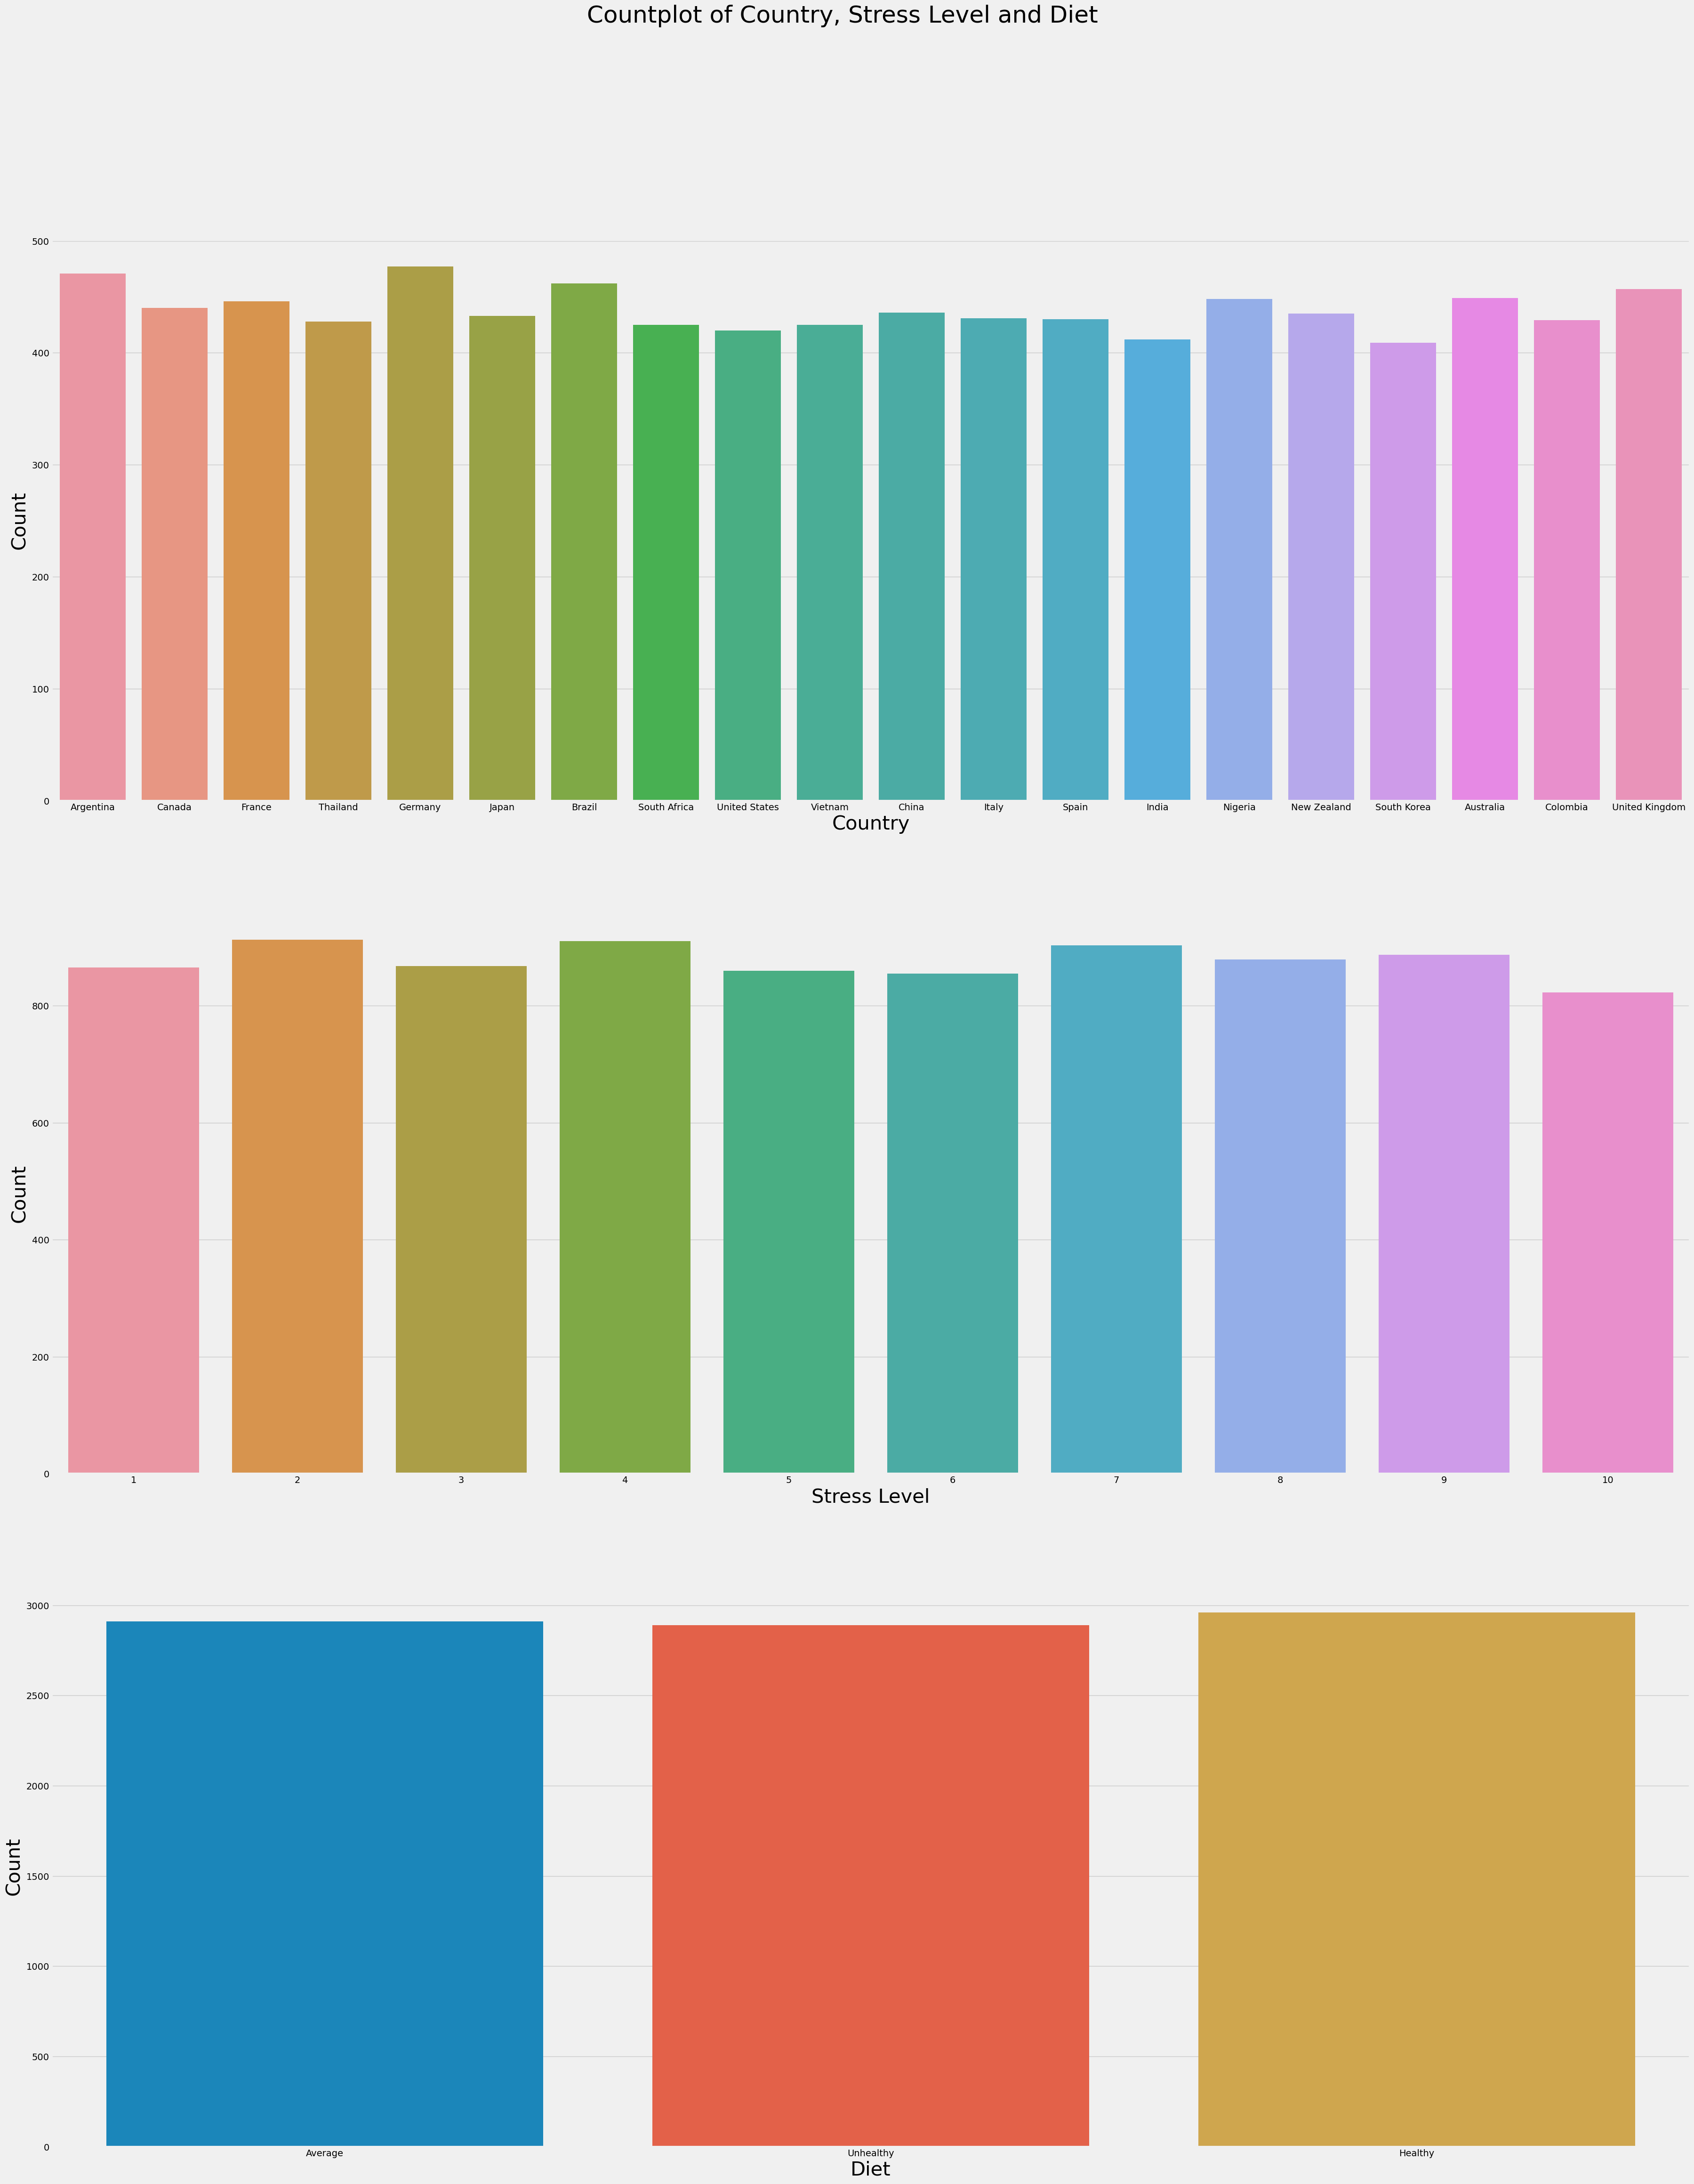

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40, 50))

plt.suptitle("Countplot of Country, Stress Level and Diet", fontsize=36)

plt.subplot(3, 1, 1)
sns.countplot(x=heart_data['Country'], data=heart_data)
plt.xlabel('Country', fontsize=30)  # Adjust the x-axis label fontsize as needed
plt.ylabel('Count', fontsize=30)  # Adjust the y-axis label fontsize as needed

plt.subplot(3, 1, 2)
sns.countplot(x=heart_data['Stress Level'], data=heart_data)
plt.xlabel('Stress Level', fontsize=30)  # Adjust the x-axis label fontsize as needed
plt.ylabel('Count', fontsize=30)  # Adjust the y-axis label fontsize as needed

plt.subplot(3, 1, 3)
sns.countplot(x=heart_data['Diet'], data=heart_data)
plt.xlabel('Diet', fontsize=30)  # Adjust the x-axis label fontsize as needed
plt.ylabel('Count', fontsize=30)  # Adjust the y-axis label fontsize as needed

plt.show()


From the visualization of the graphs above this cell, we can see that the rest of the categorical variables are balanced. There isn't a big difference between the number of values for each variable. 

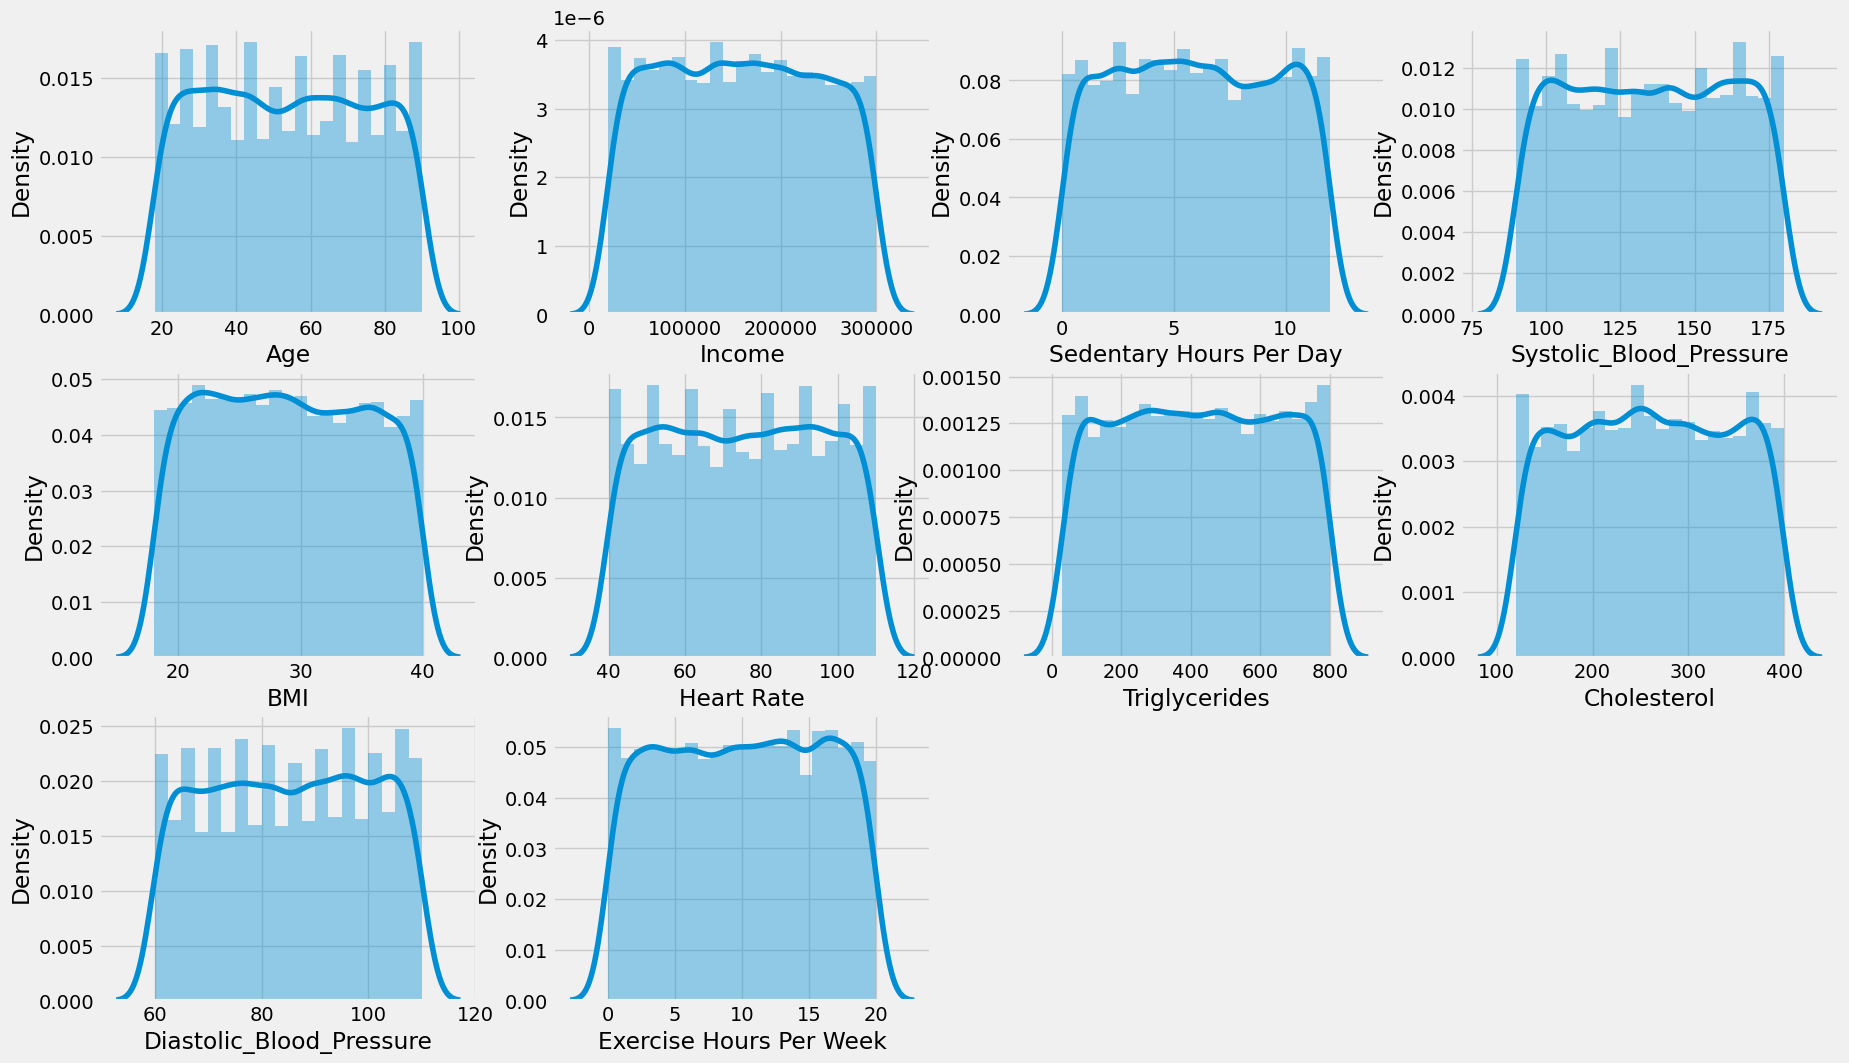

In [15]:
discrete_and_continuous = list(set(continuous) | set(discrete))
plt.figure(figsize=(20, 12))
for i, var in enumerate(discrete_and_continuous, 1):
    plt.subplot(3, 4, i)
    sns.distplot(heart_risk[var])

plt.savefig('2')

Systolic_Blood_Pressure: The distribution is approximately normal with a slight right skew. Most individuals' systolic blood pressure levels fall within a normal range, with fewer instances of very high or very low readings.

Diastolic_Blood_Pressure: This variable shows a near-normal distribution, suggesting that diastolic blood pressure for most individuals is within a common range, but with a slight tendency toward higher values.

Heart Rate: The distribution is roughly normal with a small right skew, indicating that most individuals have a heart rate within a typical resting range.

Sedentary Hours Per Day: The bimodal distribution indicates two prevailing patterns of sedentary behavior, with groups of individuals spending either lower or higher amounts of time being sedentary.

Cholesterol: The multimodal distribution suggests the presence of several distinct groups within the population, each with different average cholesterol levels.

Exercise Hours Per Week: The right-skewed distribution shows that a larger number of individuals report exercising few hours per week, with the number decreasing as the number of exercise hours increases.

Income: The distribution is highly right-skewed, indicating that the majority of individuals fall into the lower income category, with fewer high-income outliers.

Age: The bimodal distribution suggests two predominant age groups, with peaks around 55 and 65 years, indicating a larger presence of middle-aged to senior individuals in the dataset.

BMI: The distribution is roughly normal with a slight left skew, suggesting that most individuals are within the normal to overweight range, with fewer individuals at the lower end of the BMI scale.


## **Exploring Numerical Variables**

### **Preparing the Data for Correlation Analysis and Classification Tasks**

In [16]:
# In this cell, we are performing encoding of categorical variables into numerical form, which is necessary for the algorithms we are using in this model since they can only handle numerical inputs.
heart_risk['Sex'] = heart_risk['Sex'].replace({'Male': 0, 'Female': 1})

heart_risk['Diet'] = heart_risk['Diet'].replace({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})

# Dictionaries are created to encode 'Country' and 'Continent' names into unique numerical codes. This is done by enumerating over the unique values in the 'Country' and 'Continent' variables.
country_to_code = {country: code for code, country in enumerate(heart_risk['Country'].unique())}
continent_to_code = {continent: code for code, continent in enumerate(heart_risk['Continent'].unique())}

#Risk factors for heart attack
risk_factors = ['Age', 'Cholesterol', 'Systolic_Blood_Pressure','Diastolic_Blood_Pressure', 'Smoking', 'Obesity', 'Diabetes', 'Family History', 'Alcohol Consumption', 'Previous Heart Problems']

# Summing up the risk factors for each patient
heart_risk['Risk Factor Count'] = heart_risk[risk_factors].sum(axis=1)

heart_risk['CountryCode'] = heart_risk['Country'].replace(country_to_code)
heart_risk['ContinentCode'] = heart_risk['Continent'].replace(continent_to_code)
heart_risk.drop(columns=['Country', 'Continent'], inplace=True)
heart_risk


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Risk Factor Count,CountryCode,ContinentCode
0,67,0,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,6,0,158.0,88.0,522.0,0,0
1,21,0,389,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,235,7,0,165.0,93.0,674.0,1,1
2,21,1,324,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,587,4,0,174.0,99.0,620.0,2,2
3,84,0,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,4,0,163.0,100.0,735.0,1,1
4,66,0,318,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,231,5,0,91.0,88.0,568.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,67,7,0,94.0,76.0,356.0,3,3
8759,28,1,120,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,617,9,0,157.0,102.0,409.0,1,1
8760,47,0,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,527,4,1,161.0,75.0,538.0,6,0
8761,36,0,178,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,114,8,0,119.0,67.0,403.0,6,0


# **Correlation Between The Features**

['Age', 'Income', 'Sedentary Hours Per Day', 'Systolic_Blood_Pressure', 'BMI', 'Heart Rate', 'Triglycerides', 'Cholesterol', 'Diastolic_Blood_Pressure', 'Exercise Hours Per Week']


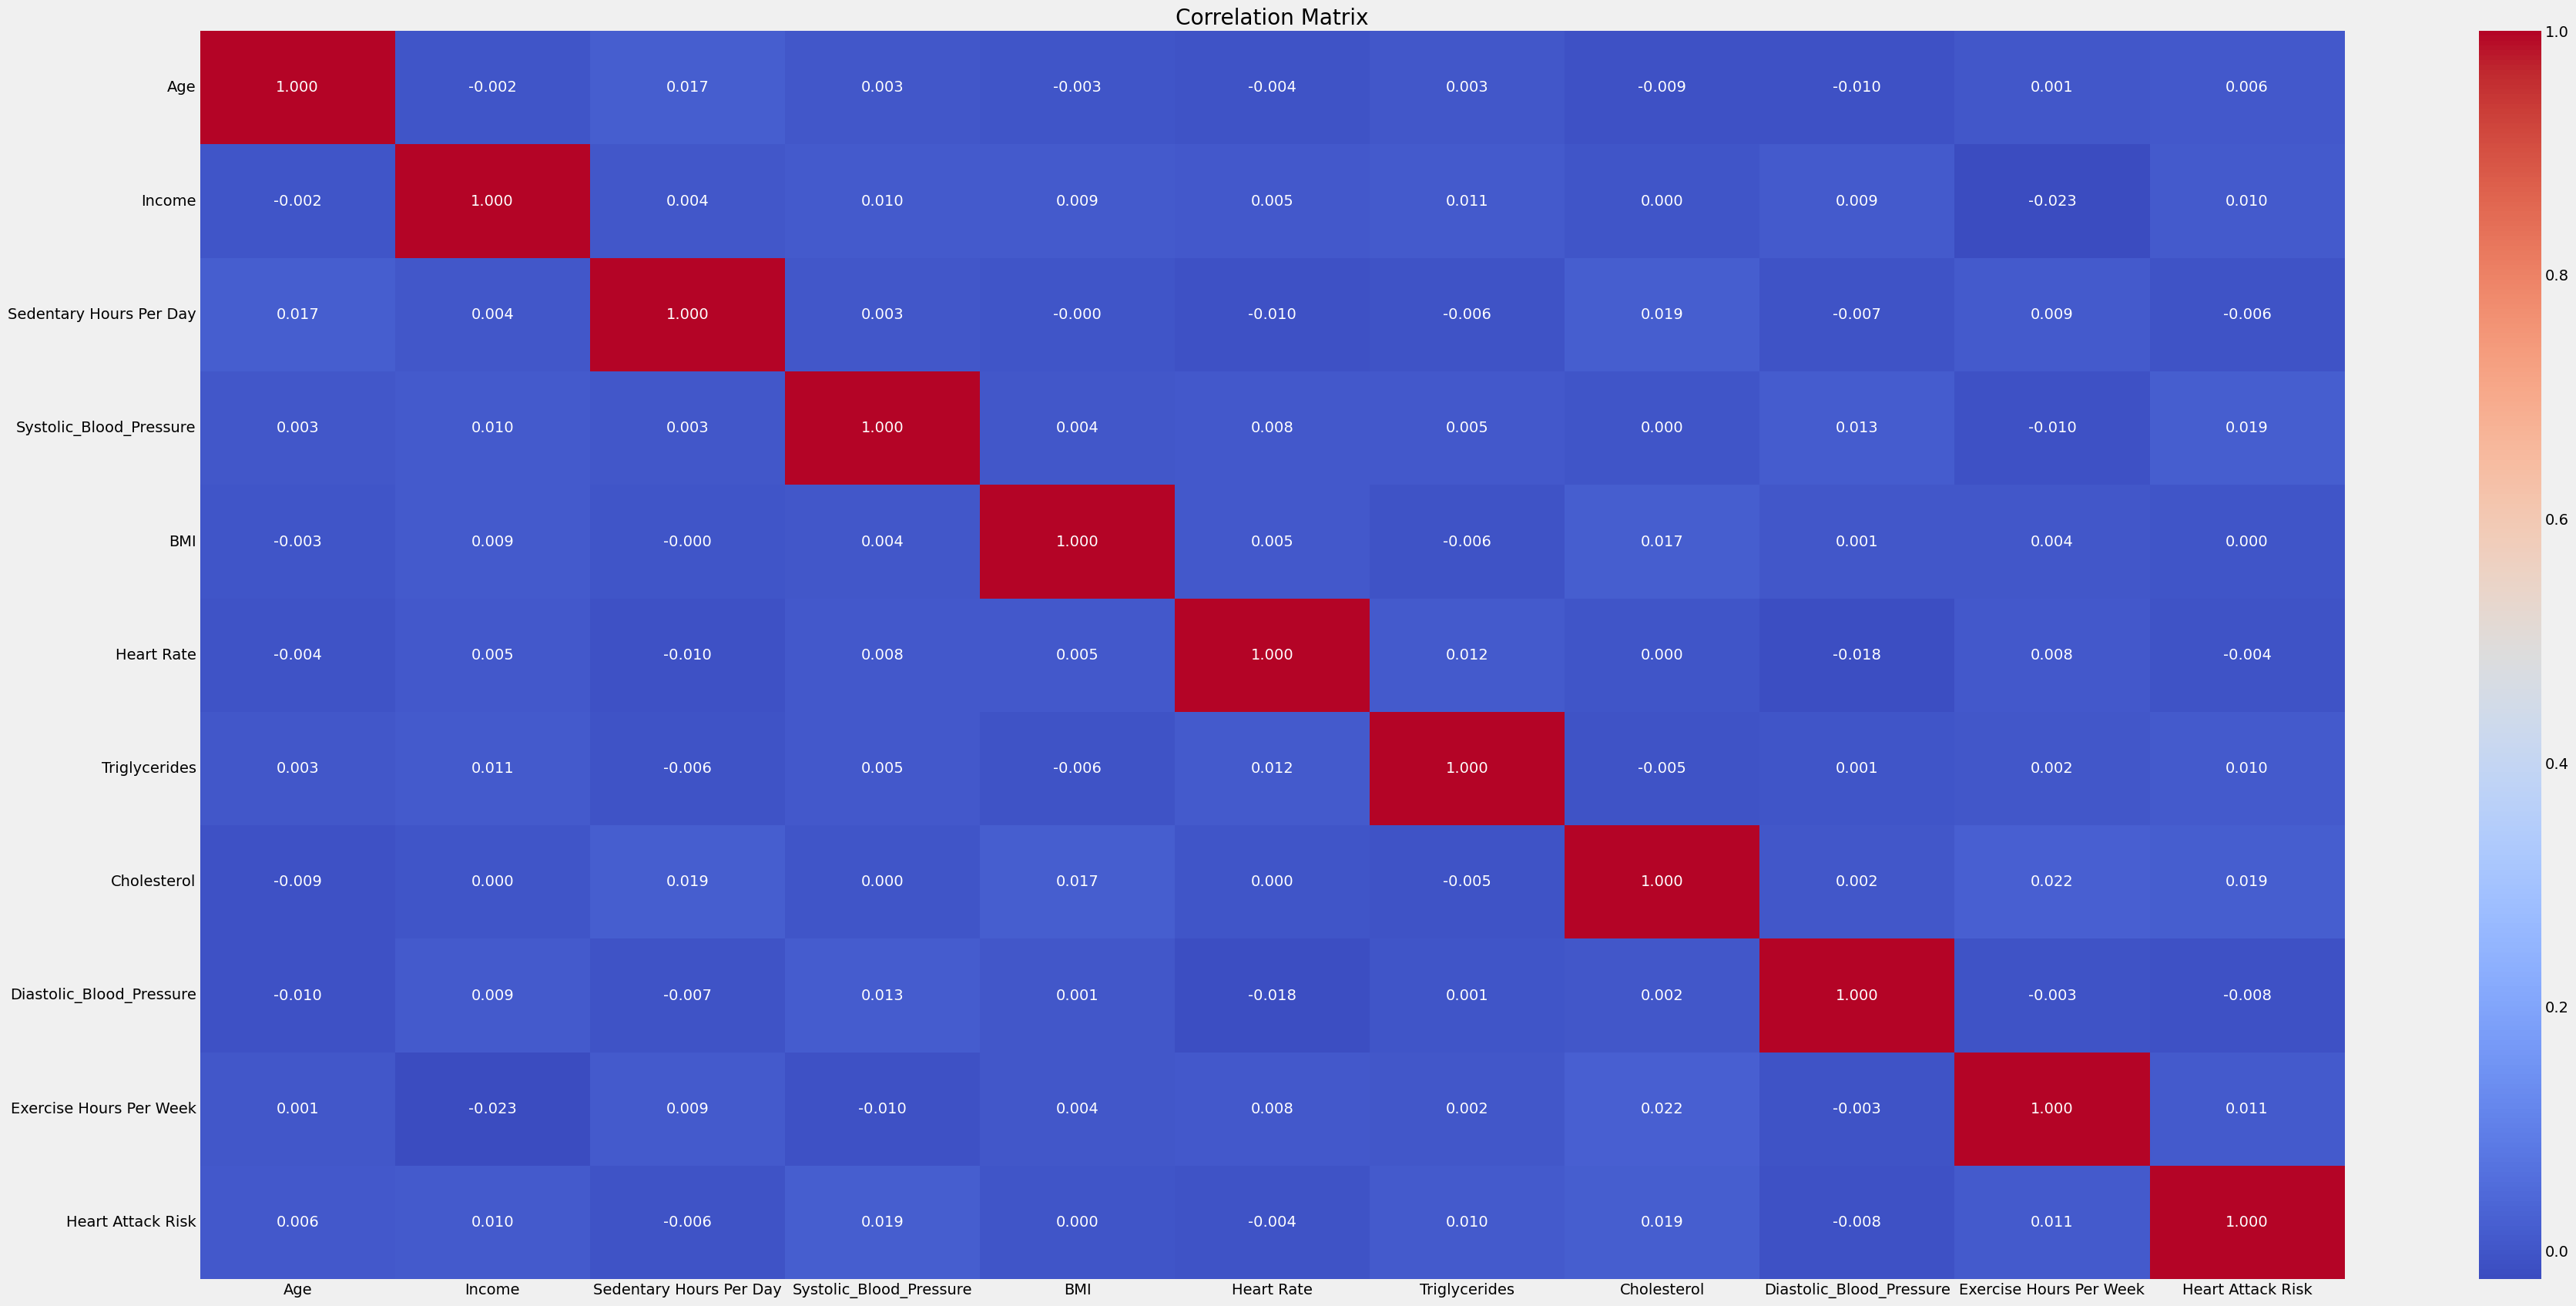

['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Sleep Hours Per Day', 'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'Risk Factor Count', 'Diet']


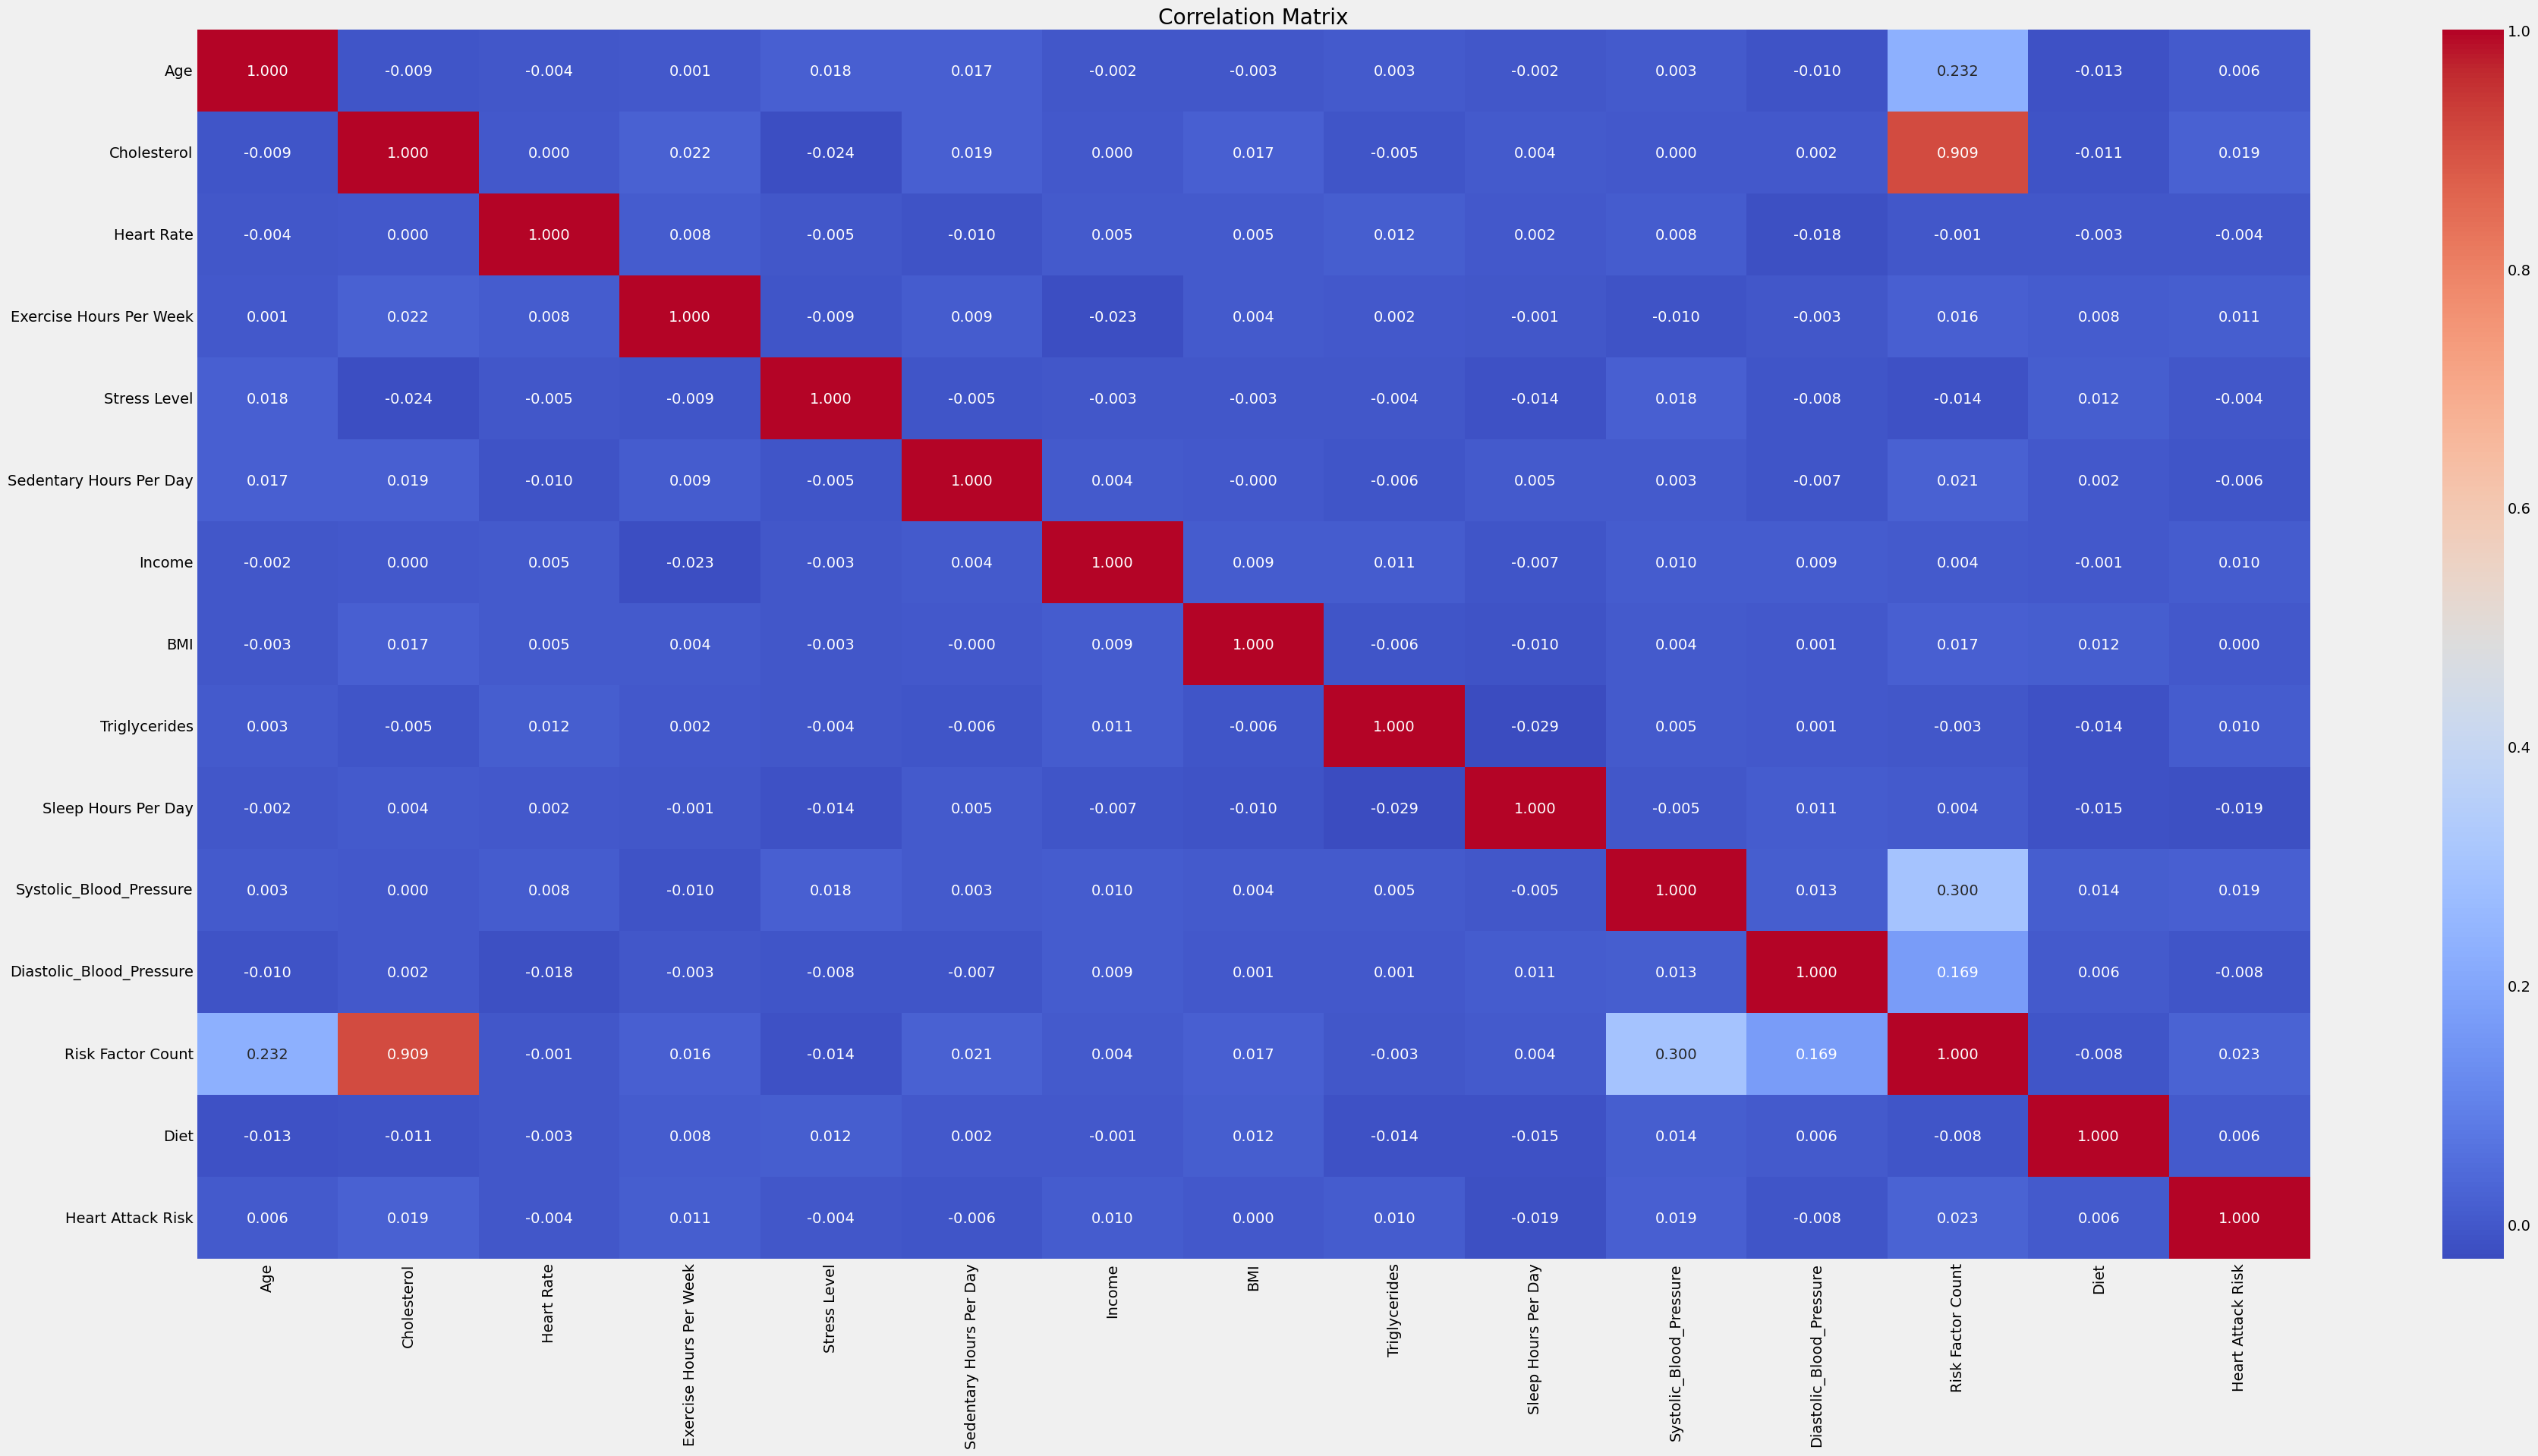

In [17]:
corr_data = discrete_and_continuous.copy()
#Fixed
#We are doing this to include Heart attack risk in the heapmap to be able to understand the correlation analysis better. 
corr_data = discrete_and_continuous + ['Heart Attack Risk']
print(discrete_and_continuous)
#We are calculating all of the numerical variables in our dataset. 
corr = heart_risk.corr()
correlations = heart_risk[corr_data].corr()

#Top 10 features based on the correlation, this is necessary for our model. 
top_features = corr['Heart Attack Risk'].abs().nlargest(10).index.tolist()
#Now we create a new Dateframe with the 10 features with the highest correlation for heart attack
X_selected = heart_risk[top_features]

plt.figure(figsize=(40, 20))
# Generate a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt = '.3f')
plt.title('Correlation Matrix')
plt.show()


continuous_data = ['Age', 'Cholesterol', 'Heart Rate',
        'Exercise Hours Per Week', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Sleep Hours Per Day', 'Systolic_Blood_Pressure',
       'Diastolic_Blood_Pressure', 'Risk Factor Count', 'Diet']

corr_data = continuous_data.copy()
#Fixed
#We are doing this to include Heart attack risk in the heapmap, so we can understand the correlation analysis better. 
corr_data = continuous_data + ['Heart Attack Risk']
print(continuous_data)
#We are calculating all of the numerical variables in our dataset 
corr = heart_risk.corr()
correlations = heart_risk[corr_data].corr()

#Top 10 features based on correlation, this is necessary for our model. 
top_features = corr['Heart Attack Risk'].abs().nlargest(10).index.tolist()
#Now we created a new Dateframe with the 10 features, with the highest correlation for heart attack
X_selected = heart_risk[top_features]

plt.figure(figsize=(40, 20))
# Generate a heatmap
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt = '.3f')
plt.title('Correlation Matrix')
plt.show()


From the first heapmap using only our discrete and continuous variables, we conclude that there is no strong linear correlation between the variables analyzed and the risk of a heart attack.
Additionally, the low correlation coefficients among the variables themselves suggest that they do not have a strong linear relationship with each other.
Consequently, this indicates that models capable of detecting non-linear relationships may be more suitable for analyzing our dataset, as linear models may not effectively capture the complexities within the data.

From the second heapmap that contains most of the variables in the data set, we can conclude the following; there is a high correlation among Risk Factor count, Age and Heart Attack Risk..As the number of risk factors increases, a similar increase is observed in Age and Heart Attack Risk.
On the other hand, Diet shows a negative correlation, indicating that a better diet is associated with a lower risk of heart attack. 
Finally, BMI has a positive correlation with Heart Attack Risk. This indicates that a higher BMI volume increases the changes of a heart attack.
The rest of the variables have similar values to those in the first heatmap. 


In [18]:
#We removed the outliers to ensure more robust data, which will help improve the accuracy of our model. Most of the times values with extreme diiferences from the mean can 
#Negatively impact the performance of a model
#We are using the z-score method to remove outliers. 
test = heart_risk[discrete_and_continuous]
# The Z-score of each value is calculated within its respective column in the 'test' DataFrame using only the continous variables.
z = np.abs(stats.zscore(test))
# We are using the common practice of considering values that are more than 3 standard deviations from the mean as outliers.
no_outliers = heart_risk[(z < 3).all(axis=1)]
no_outliers

# print(heart_risk.columns)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Risk Factor Count,CountryCode,ContinentCode
0,67,0,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,6,0,158.0,88.0,522.0,0,0
1,21,0,389,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,235,7,0,165.0,93.0,674.0,1,1
2,21,1,324,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,587,4,0,174.0,99.0,620.0,2,2
3,84,0,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,4,0,163.0,100.0,735.0,1,1
4,66,0,318,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,231,5,0,91.0,88.0,568.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,67,7,0,94.0,76.0,356.0,3,3
8759,28,1,120,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,617,9,0,157.0,102.0,409.0,1,1
8760,47,0,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,527,4,1,161.0,75.0,538.0,6,0
8761,36,0,178,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,114,8,0,119.0,67.0,403.0,6,0


In [19]:
#We removed the outliers to be able to have a more robust data to improve the accuracy of our model. Most of the time, values with extreme differences from the mean can 
#Negatively impact the performance of a model
#We are using the z-score method to remove outliers. 
test = heart_risk[continuous_data]
# The Z-score of each value is calculated within its respective column, the 'test' DataFrame is only using the continuous variables.
z = np.abs(stats.zscore(test))
# We are using the common practice of considering the values that are more than 3 standard deviations from the mean as outliers.
no_outliers = heart_risk[(z < 3).all(axis=1)]
no_outliers


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Risk Factor Count,CountryCode,ContinentCode
0,67,0,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,6,0,158.0,88.0,522.0,0,0
1,21,0,389,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,235,7,0,165.0,93.0,674.0,1,1
2,21,1,324,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,587,4,0,174.0,99.0,620.0,2,2
3,84,0,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,4,0,163.0,100.0,735.0,1,1
4,66,0,318,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,231,5,0,91.0,88.0,568.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,0,121,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,67,7,0,94.0,76.0,356.0,3,3
8759,28,1,120,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,617,9,0,157.0,102.0,409.0,1,1
8760,47,0,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,527,4,1,161.0,75.0,538.0,6,0
8761,36,0,178,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,114,8,0,119.0,67.0,403.0,6,0


In [20]:
#Dropping the Heart Attack Risk column because it is our target variable.
target = heart_risk['Heart Attack Risk']


heart_risk.drop('Heart Attack Risk', axis=1, inplace=True)

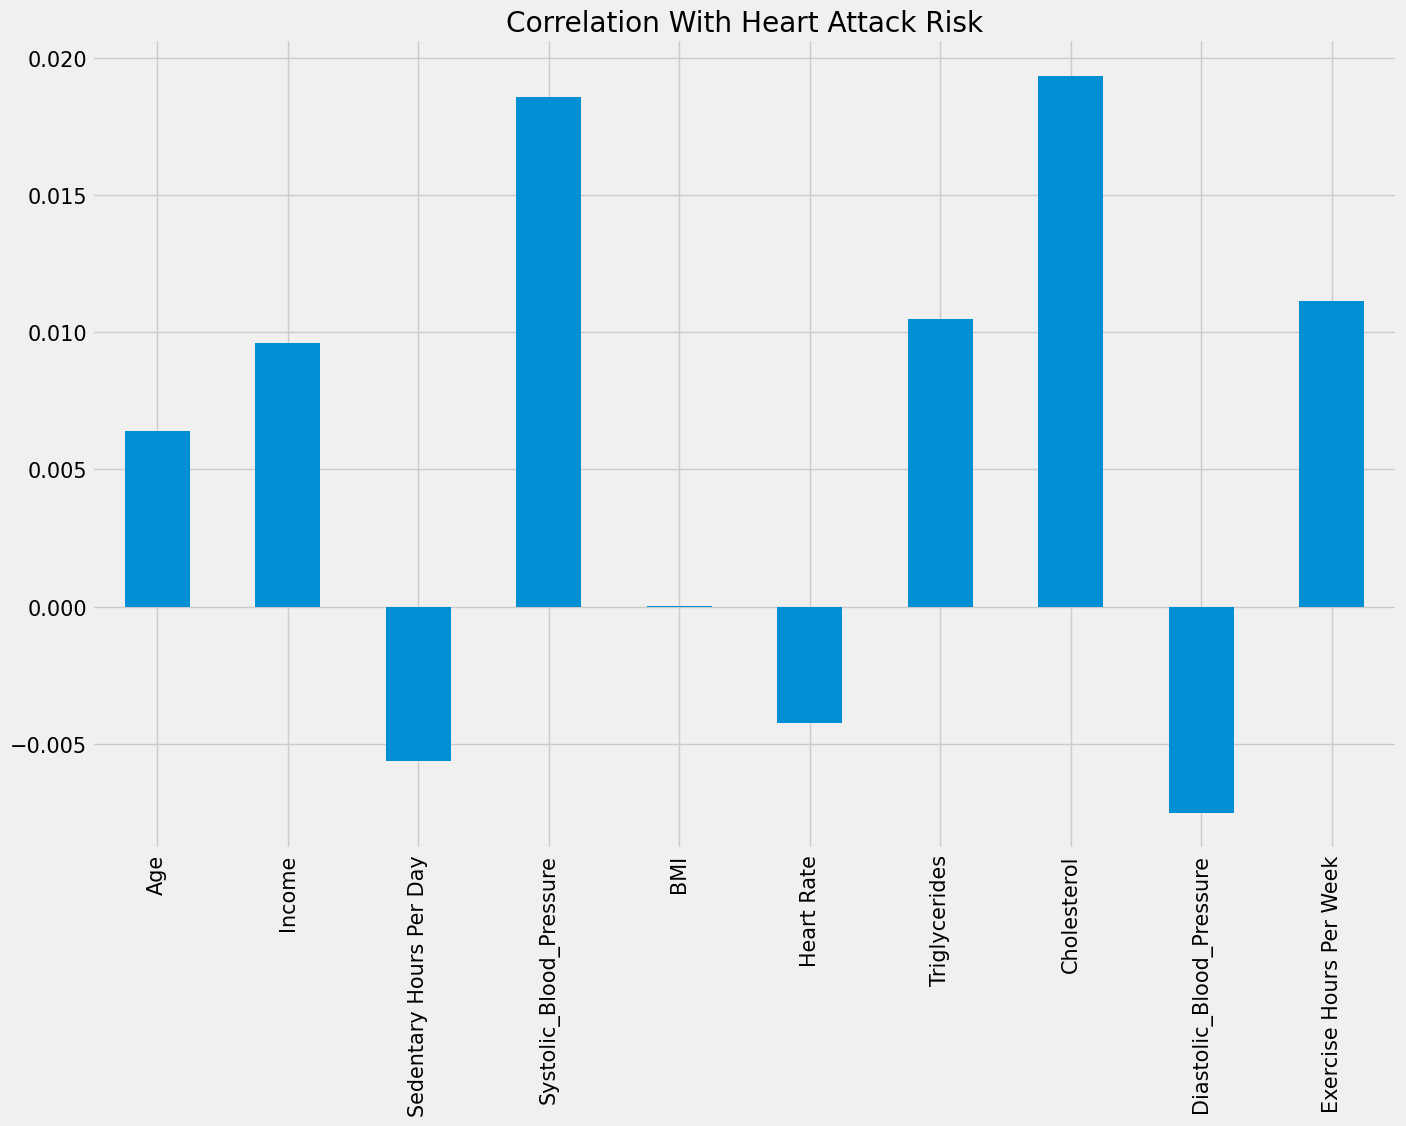

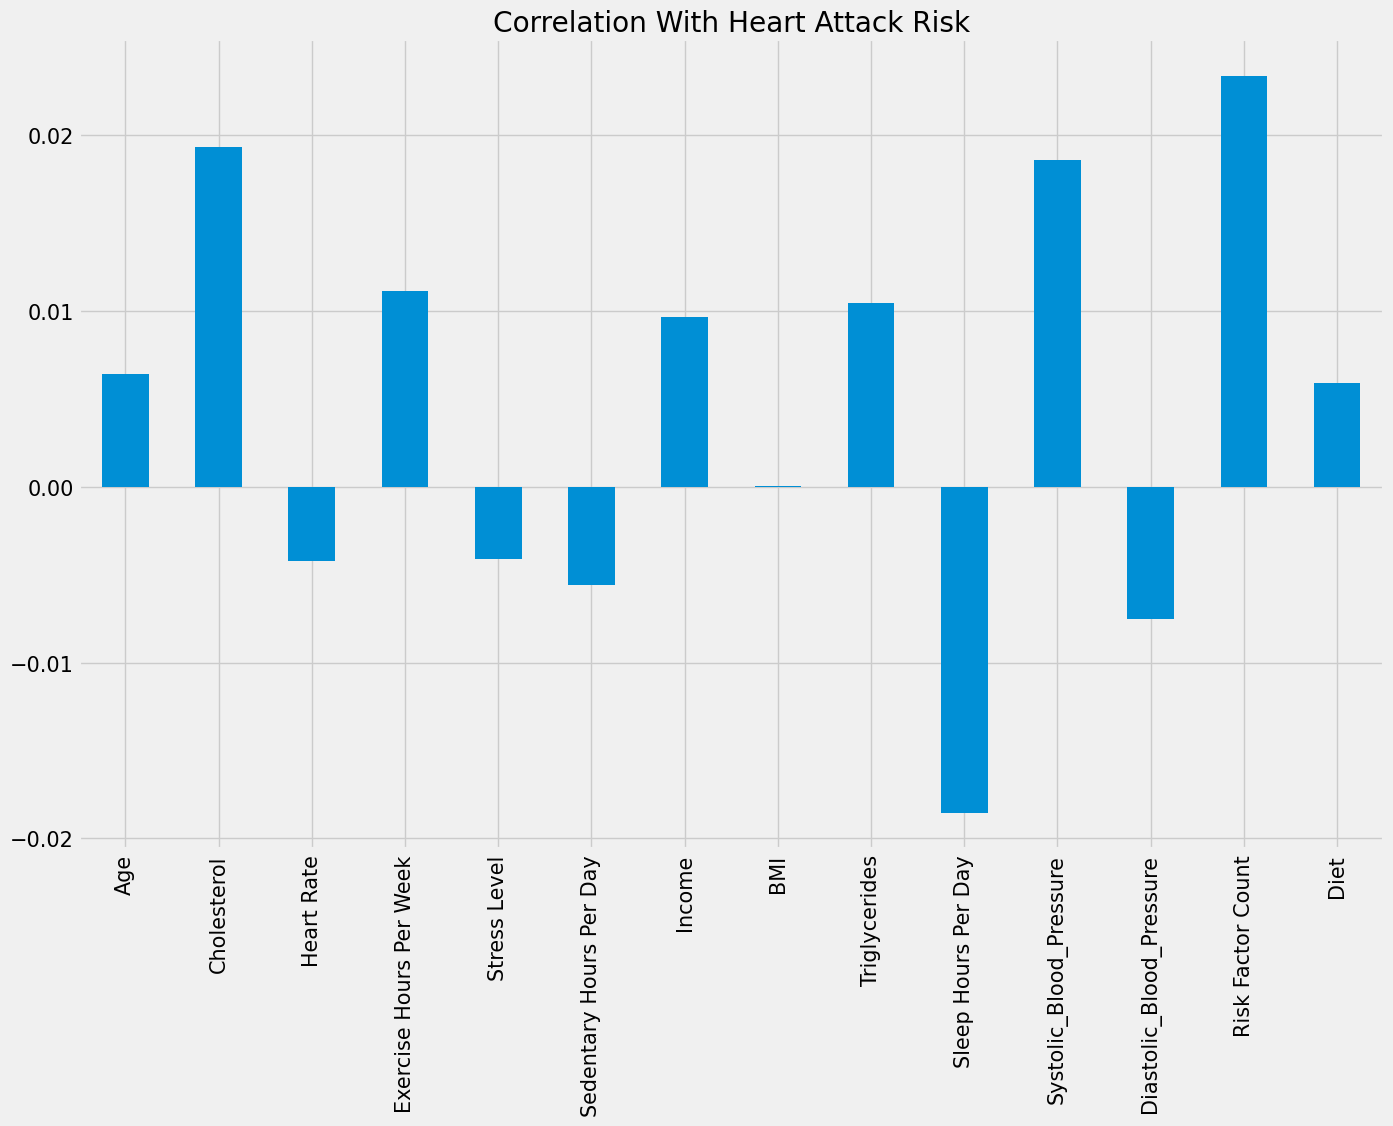

In [21]:
# print(discrete_and_continuous) correlations
heart_risk[discrete_and_continuous].corrwith(target).plot.bar(
    figsize=(15, 10), title='Correlation With Heart Attack Risk',
    fontsize=15, rot=90, grid=True)
plt.savefig('5')
plt.show()

#Show the Continuous_data set variables correlations. 
heart_risk[continuous_data].corrwith(target).plot.bar(
    figsize=(15, 10), title='Correlation With Heart Attack Risk',
    fontsize=15, rot=90, grid=True)
plt.savefig('5')
plt.show()

In [22]:
#Preparing different data for classification with only 10 features
#All of the dataframes are numerical type, but some of them are categorical in nature.
#For that reason we are only applying StandardScaler to the numerical variables.
#We don't need to apply StandardScaler to the categorical variables because those are already represented by 0s and 1s. 


binary_selected = ['Diabetes', 'Alcohol Consumption', 'Obesity']
numeric = ['Risk Factor Count', 'Cholesterol', 'Systolic_Blood_Pressure', 'Sleep Hours Per Day', 'Exercise Hours Per Week', 'Triglycerides']
X_selected = pd.get_dummies(X_selected, columns = binary_selected)


scaler = StandardScaler()
X_selected[numeric] = scaler.fit_transform(X_selected[numeric])
X_selected.drop('Heart Attack Risk', axis=1, inplace=True)
X_selected


,Risk Factor Count,Cholesterol,Systolic_Blood_Pressure,Sleep Hours Per Day,Exercise Hours Per Week,Triglycerides,Diabetes_0,Diabetes_1,Alcohol Consumption_0,Alcohol Consumption_1,Obesity_0,Obesity_1
0,-0.174073,-0.641579,0.870044,-0.514750,-1.010838,-0.588539,1,0,1,0,1,0
1,1.538002,1.596895,1.135714,-0.011823,-1.418027,-0.816487,0,1,0,1,0,1
2,0.929765,0.793023,1.477290,-1.520604,-1.372188,0.756800,0,1,1,0,1,0
3,2.225085,1.522691,1.059809,-1.520604,-0.032188,-0.177339,0,1,0,1,1,0
4,0.344055,0.718820,-1.672797,-1.017677,-0.727941,-0.834365,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8758,-2.043840,-1.717530,-1.558939,-0.011823,-0.362578,-1.567374,0,1,0,1,1,0
8759,-1.446866,-1.729898,0.832092,0.994032,1.131536,0.890887,0,1,1,0,0,1
8760,0.006145,-0.122154,0.983903,-1.520604,-1.187161,0.488626,1,0,0,1,0,1
8761,-1.514448,-1.012597,-0.610117,0.491104,-1.076238,-1.357305,0,1,1,0,1,0


In [23]:


nominal_data = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Medication Use', 'Previous Heart Problems']
heart_risk = pd.get_dummies(heart_risk, columns = nominal_data)


scaler = StandardScaler()

# Applying the scaler to the continuous variables
heart_risk[continuous_data] = scaler.fit_transform(heart_risk[continuous_data])
heart_risk

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Diet,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Sleep Hours Per Day,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Risk Factor Count,CountryCode,ContinentCode,Sex_0,Sex_1,Diabetes_0,Diabetes_1,Family History_0,Family History_1,Smoking_0,Smoking_1,Obesity_0,Obesity_1,Alcohol Consumption_0,Alcohol Consumption_1,Medication Use_0,Medication Use_1,Previous Heart Problems_0,Previous Heart Problems_1
0,0.625557,-0.641579,-0.147042,-1.010838,-0.009637,1.234604,0.179251,1.280130,0.373454,-0.588539,-0.514750,0.870044,0.193782,-0.174073,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,-1.539322,1.596895,1.118179,-1.418027,-1.233496,-1.563129,-0.297225,1.582523,-0.268479,-0.816487,-0.011823,1.135714,0.534480,1.538002,1,1,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1
2,-1.539322,0.793023,-0.147042,-1.372188,1.214223,1.234604,1.001031,0.955917,-0.113134,0.756800,-1.520604,1.477290,0.943319,0.929765,2,2,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1
3,1.425621,1.522691,-0.098380,-0.032188,-0.009637,1.234604,0.477557,-0.404902,1.198524,-0.177339,-1.520604,1.059809,1.011458,2.225085,1,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1
4,0.578495,0.718820,0.874867,-0.727941,-1.233496,0.185454,-1.292170,0.028445,-1.120826,-0.834365,-1.017677,-1.672797,0.193782,0.344055,3,3,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,-1.717530,-0.682328,-0.362578,1.214223,0.884887,1.388476,0.957630,-1.461594,-1.567374,-0.011823,-1.558939,-0.623895,-2.043840,3,3,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
8759,-1.209884,-1.729898,-0.098380,1.131536,1.214223,0.884887,-0.623356,0.739945,-0.775078,0.890887,0.994032,0.832092,1.147738,-1.446866,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0
8760,-0.315695,-0.122154,1.458815,-1.187161,-0.009637,-0.164263,-1.043943,-1.505080,1.030999,0.488626,-1.520604,0.983903,-0.692035,0.006145,6,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1
8761,-0.833383,-1.012597,-0.730990,-1.076238,-1.233496,-0.164263,-1.720804,0.641423,-0.252804,-1.357305,0.491104,-0.610117,-1.237152,-1.514448,6,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1


# **Classification**

### **Neural Network**


Epoch 1/75


120/120 [==============================] - 2s 7ms/step - loss: 0.6930 - accuracy: 0.5055 - val_loss: 0.6925 - val_accuracy: 0.5126
Epoch 2/75
120/120 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5228 - val_loss: 0.6927 - val_accuracy: 0.5073
Epoch 3/75
120/120 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5197 - val_loss: 0.6925 - val_accuracy: 0.5115
Epoch 4/75
120/120 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5280 - val_loss: 0.6925 - val_accuracy: 0.5115
Epoch 5/75
120/120 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5271 - val_loss: 0.6924 - val_accuracy: 0.5115
Epoch 6/75
120/120 [==============================] - 1s 4ms/step - loss: 0.6903 - accuracy: 0.5297 - val_loss: 0.6924 - val_accuracy: 0.5162
Epoch 7/75
120/120 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5319 - val_loss: 0.6933 - val_accuracy: 0.5063
Epo

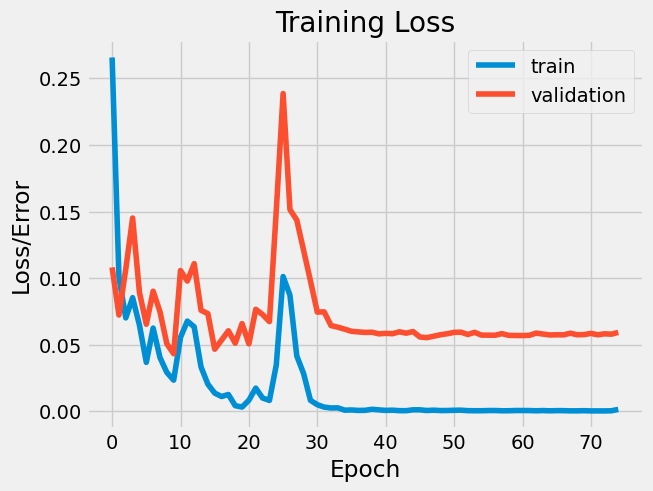

In [24]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, roc_curve

#Using only top 10 discrete and continuous variables 
X_selected = shuffle(X_selected, random_state=0)
Y = target

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=0)
X_oversampled, Y_oversampled = oversampler.fit_resample(X_selected, Y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, Y_oversampled, test_size=0.15, random_state=42)

# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
    Dense(256, activation='relu'),
#     Dropout(0.2),
    Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(64, activation='relu'),
#     Dropout(0.2),
    Dense(32, activation='relu'),  # Additional hidden laye
#     Dropout(0.2),
    Dense(16, activation='relu'),  # Additional hidden layer
#     Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
])

model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.8)
, loss='binary_crossentropy', metrics=['accuracy'])



# 5-fold cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

conf_matrices = []
f1_scores = []

# for train_index, test_index in skf.split(X_oversampled, Y_oversampled):
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]



    #set verbose to 0 so it won't print all the info
    history = model.fit(X_train_fold, y_train_fold, epochs=75, batch_size=64, verbose=1, validation_data=(X_test_fold, y_test_fold))


    # Model Prediction
    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")

    # Compute confusion matrix and F1 score for the fold
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold, average='weighted')

    # Append results to lists
    conf_matrices.append(conf_matrix_fold)
    f1_scores.append(f1_fold)

# Average results over folds
avg_conf_matrix = sum(conf_matrices) / n_folds
avg_f1_score = sum(f1_scores) / n_folds


# Predict probabilities on the test set
y_pred_proba = model.predict(X_test).ravel()

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)


# Calculate precision-recall curve values


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

print("Average Precision-Recall Score:", average_precision)



print("Average Confusion Matrix:\n", avg_conf_matrix)
print("Average F1 Score:", avg_f1_score)

# Model Prediction on the original test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix and F1 score on the original test set
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix on Test Set:\n", conf_matrix)
print("F1 Score on Test Set:", f1)

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.title('Training Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()



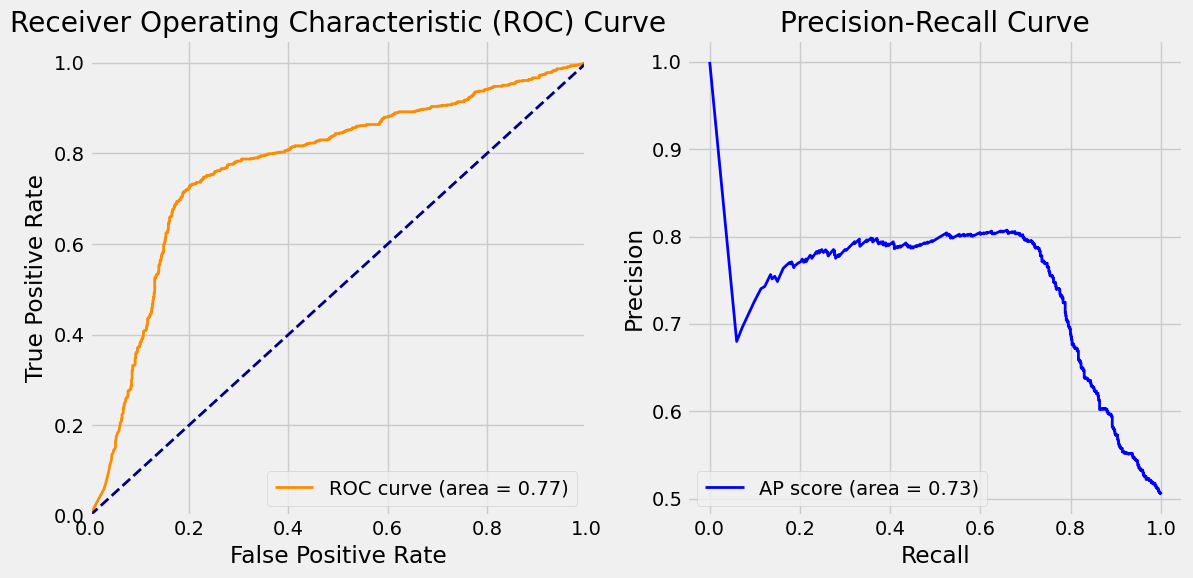

In [25]:
# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'AP score (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

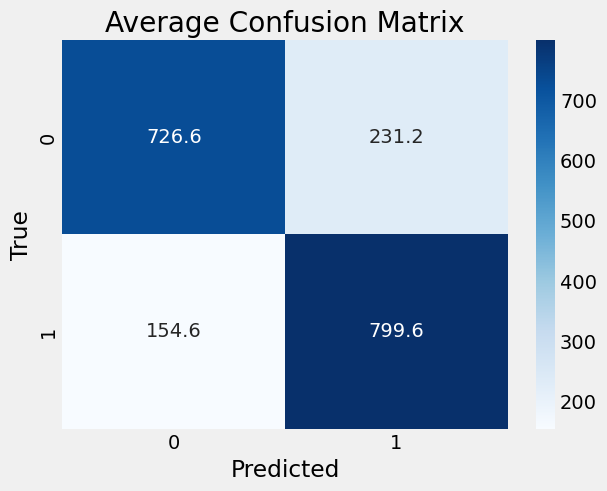

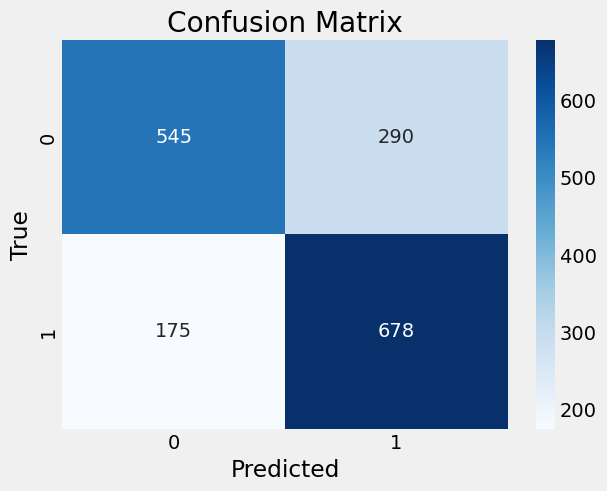

In [26]:
#Visualization of the confusion matrix. 
sns.heatmap(avg_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Average Confusion Matrix')
plt.show()


#Visualization of the confusion matrix. 
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In this NNs implementation, we only used the continuous and discrete variables that were provide earlier by our model. 

(This analysis pertains to a single iteration of our model, yet the outcomes observed here closely mirror those seen in most of our other runs.)

This first confusion matrix showed the performance of the NNs model on the set using multiple validations (Train set). 
Then we can conclude the following from the performance of the model. 
We have an average of 749 true negatives, 208.8 false positives, 143.2 false negatives and 811 true positives In this attempt.
We have an average of .81 in the F1 score indicating a adequate perfomance of the model.
In this sections results for each attempt vary between .79 and .82 on the F1 score results

This confusion matrix showed the perfomance of the NNs model on the test set. 
Then we can conclude the following from the test set. 
We have 562 true negatives, 273 false positives, 177 false negatives and 676 true positives In this attempt.
F1 Score on Test Set is 0.73 indicating a decent perfomance on the test set. 
In this section results for each attempt vary between .71 and .74 and the F1 score results. 



Epoch 1/75
120/120 [==============================] - 2s 7ms/step - loss: 0.6940 - accuracy: 0.4971 - val_loss: 0.6933 - val_accuracy: 0.4869
Epoch 2/75
120/120 [==============================] - 1s 4ms/step - loss: 0.6930 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4974
Epoch 3/75
120/120 [==============================] - 1s 5ms/step - loss: 0.6926 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5016
Epoch 4/75
120/120 [==============================] - 1s 4ms/step - loss: 0.6921 - accuracy: 0.5318 - val_loss: 0.6930 - val_accuracy: 0.5021
Epoch 5/75
120/120 [==============================] - 1s 4ms/step - loss: 0.6917 - accuracy: 0.5271 - val_loss: 0.6929 - val_accuracy: 0.4979
Epoch 6/75
120/120 [==============================] - 1s 4ms/step - loss: 0.6913 - accuracy: 0.5358 - val_loss: 0.6929 - val_accuracy: 0.5010
Epoch 7/75
120/120 [==============================] - 1s 5ms/step - loss: 0.6910 - accuracy: 0.5426 - val_loss: 0.6928 - val_accuracy: 0.5105
Epoch 

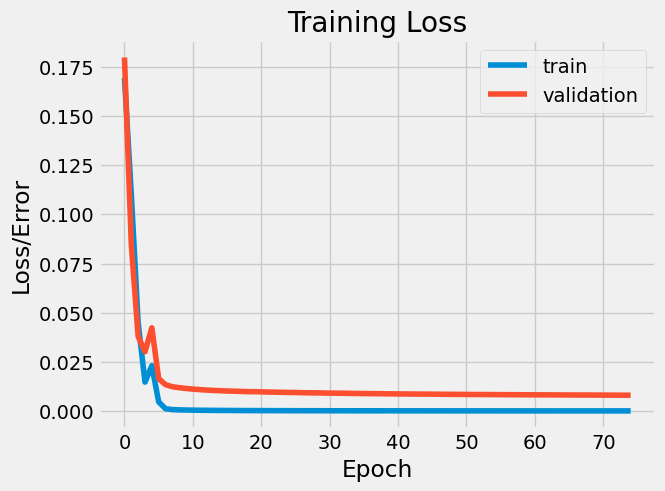

In [27]:
heart_risk = shuffle(heart_risk, random_state=0)
to_drop = ['CountryCode', 'ContinentCode']
X = heart_risk.drop(to_drop, axis=1)
Y = target

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=0)
X_oversampled, Y_oversampled = oversampler.fit_resample(X, Y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, Y_oversampled, test_size=0.15, random_state=42)

# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
    Dense(256, activation='relu'),
#     Dropout(0.2),
    Dense(128, activation='relu'),
#     Dropout(0.2),
    Dense(64, activation='relu'),
#     Dropout(0.2),
    Dense(32, activation='relu'),  # Additional hidden laye
#     Dropout(0.2),
    Dense(16, activation='relu'),  # Additional hidden layer
#     Dropout(0.2),
    Dense(1, activation='sigmoid')  # Single neuron with sigmoid activation for binary classification
])

model.compile(optimizer = SGD(learning_rate=0.01, momentum=0.8)
, loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# 5-fold cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

conf_matrices = []
f1_scores = []

# for train_index, test_index in skf.split(X_oversampled, Y_oversampled):
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]


    #set verbose to 0 so it won't print all the info
    history = model.fit(X_train_fold, y_train_fold, epochs=75, batch_size=64, verbose=1, validation_data=(X_test_fold, y_test_fold))


    # Model Prediction
    y_pred_fold = (model.predict(X_test_fold) > 0.5).astype("int32")

    # Compute confusion matrix and F1 score for the fold
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold, average='weighted')

    # Append results to lists
    conf_matrices.append(conf_matrix_fold)
    f1_scores.append(f1_fold)

# Average results over folds
avg_conf_matrix_r= sum(conf_matrices) / n_folds
avg_f1_score = sum(f1_scores) / n_folds

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test).ravel()

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)


# Calculate precision-recall curve values


precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

print("Average Precision-Recall Score:", average_precision)

print("Average Confusion Matrix:\n", avg_conf_matrix)
print("Average F1 Score:", avg_f1_score)

# Model Prediction on the original test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix and F1 score on the original test set
conf_matrix_r = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix on Test Set:\n", conf_matrix)
print("F1 Score on Test Set:", f1)

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.title('Training Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


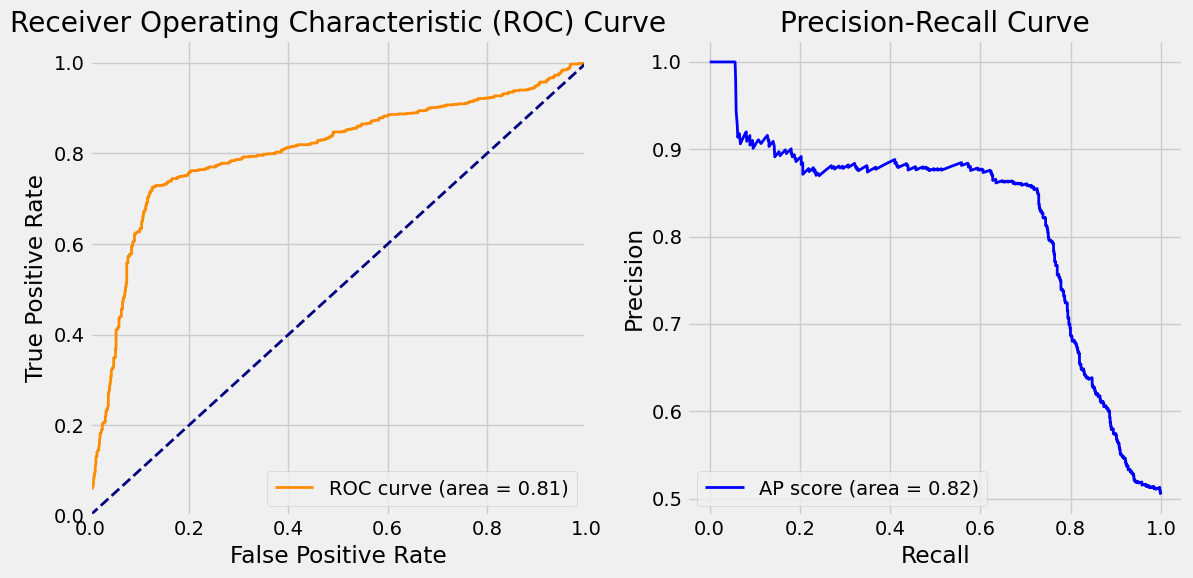

In [28]:
# Plot ROC curve

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")



# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'AP score (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

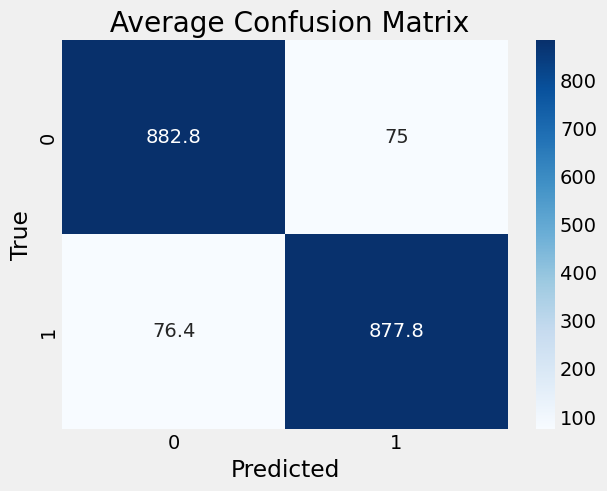

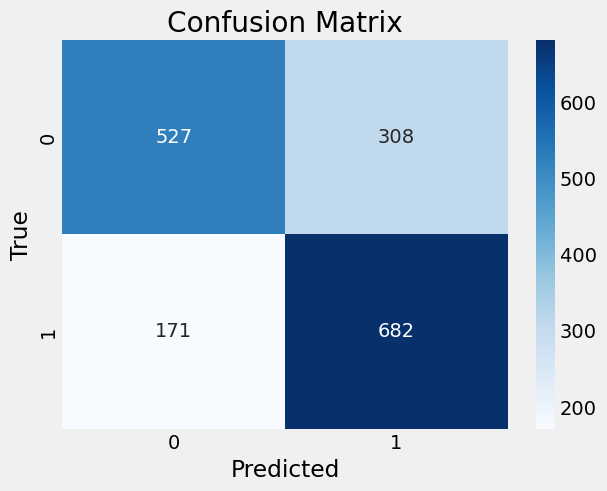

In [29]:

#Visualization of the confusion matrix. 
sns.heatmap(avg_conf_matrix_r, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(' Average Confusion Matrix')
plt.show()

#Visualization of the confusion matrix. 
sns.heatmap(conf_matrix_r, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In this NNs implementation we use most of the variables in the data set. 

(This analysis pertains to a single iteration of our model, yet the outcomes observed here closely mirror those seen in most of our other runs.)

This confusion matrix showed the performance of the NNs model on the test set using multiple validations(Train set). 
Then we can conclude the following from the performance of the model. 
We have an average of 866.2 true negatives, 91.6 false positives, 69.8 false negatives and 884.4 true positives in this attempt.
We have an average of .92 in the F1 score indicating an adequate performance of the model.
In this section's results for each attempt vary between .89 and 92 on the F1 score results.

This confusion matrix showed the performance of the NNs model on the test set. 
Then we can conclude the following from the test set. 
We have 543 true negatives, 292 false positives, 180 false negatives and 673 true positives in this attempt.
F1 Score on Test Set is 0.72 indicating a decent performance on the test set. 
In this section results, each attempt can vary between .70 and .73 as well as the F1 score results. 
(This is one of the best results we had so far)

The ROC-AUC and precision-recall scores, which range from .76 to .80, indicate that our model is performing commendably. Specifically, these metrics suggest a solid balance between precision and recall, alongside the model's proficient ability to distinguish between the positive and negative classes.
We had a similar situation with the first attempt using fewer variables. With a small variation on the recall score, the range was between .74 to .76

## **XGBoost**

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, average_precision_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
roc_auc_scores = []
precision_recall_scores = []

for train_index, test_index in kf.split(X_resampled, Y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    Y_train, Y_test = Y_resampled.iloc[train_index], Y_resampled.iloc[test_index]
    
    # Train the model
    xgb_model.fit(X_train, Y_train)
    
    # Predict probabilities for ROC AUC and precision-recall AUC
    probabilities = xgb_model.predict_proba(X_test)[:, 1]
    
    # Calculate and store the scores
    f1_scores.append(f1_score(Y_test, xgb_model.predict(X_test), average='weighted'))
    roc_auc_scores.append(roc_auc_score(Y_test, probabilities))
    precision_recall_scores.append(average_precision_score(Y_test, probabilities))

# Print average scores
print("Average Cross-Validation F1 Score(XGboost): {:.2f}".format(sum(f1_scores) / len(f1_scores)))
print("Average Cross-Validation ROC-AUC Score(XGboost): {:.2f}".format(sum(roc_auc_scores) / len(roc_auc_scores)))
print("Average Cross-Validation Precision-Recall AUC Score(XGboost): {:.2f}".format(sum(precision_recall_scores) / len(precision_recall_scores)))






Average Cross-Validation F1 Score(XGboost): 0.68
Average Cross-Validation ROC-AUC Score(XGboost): 0.74
Average Cross-Validation Precision-Recall AUC Score(XGboost): 0.80


XGBoost exhibits performance comparable to that of neural network models, achieving an F1 score of 0.68, a ROC-AUC score of 0.74, and a precision-recall score of 0.80. These scores indicate that our model maintains a reasonable balance between precision and recall, and possesses a fair ability to distinguish between positive and negative classes. The model is adept at predicting positive samples while minimizing the generation of false positives. 

## **Logistic Regression**

Average Confusion Matrix:
 [[882.8  75. ]
 [ 76.4 877.8]]
Average F1 Score(Logistic Regression): 0.6750225425380486
Confusion Matrix on Test Set:
 [[557 567]
 [324 304]]
F1 Score on Test Set(Logistic Regresion): 0.5018412552879454


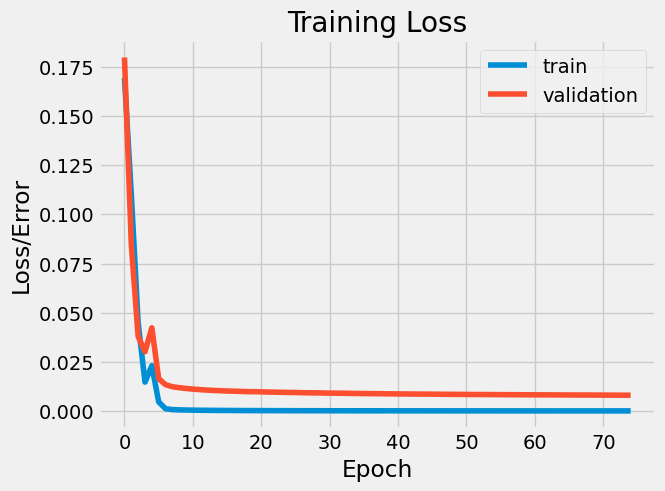

In [31]:
# Initialize StratifiedKFold for 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)


# Lists to store evaluation metrics for each fold
accuracy_scores = []
classification_reports = []
confusion_matrices = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Over-sample the training data
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    # Train the model
    logreg_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = logreg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    classification_reports.append(class_report)
    confusion_matrices.append(conf_matrix)
avg_conf_matrix = sum(conf_matrices) / n_folds
avg_f1_score = sum(f1_scores) / n_folds

print("Average Confusion Matrix:\n", avg_conf_matrix)
print("Average F1 Score(Logistic Regression):", avg_f1_score)

#Model Prediction on the original test set
y_pred = (logreg_model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix and F1 score on the original test set
conf_matrix_l = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix on Test Set:\n", conf_matrix)
print("F1 Score on Test Set(Logistic Regresion):", f1)

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss/Error')
plt.title('Training Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


For this logistic regression implementation, we also tried an iterative optimization process to keep the results consistent with our NNs implementation. They were way too different. The F1 scores were .67 and .50



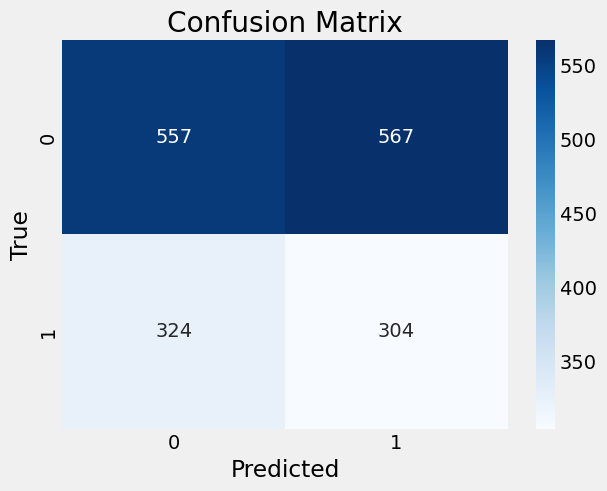

In [32]:
sns.heatmap(conf_matrix_l, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Random Forest**

Accuracy: 0.618938961779806
Confusion Matrix:
 [[1033   92]
 [ 576   52]]
F1 Score(Random Forest): 0.5332168019544344
ROC-AUC Score (Random Forest): 0.5109221514508139
Average Precision-Recall Score(Random Forest): 0.36591936094460004


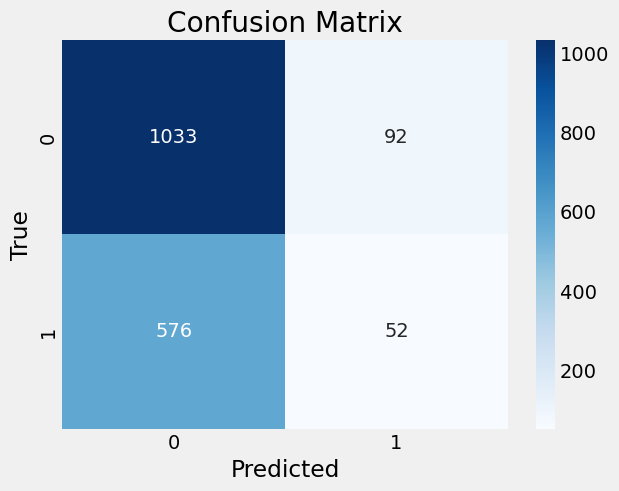

In [33]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Oversample the minority class to balance the dataset
oversampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # get the probabilities of the positive class


# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate precision-recall curve
average_precision = average_precision_score(y_test, y_pred_proba)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score(Random Forest):", f1)

print("ROC-AUC Score (Random Forest):", roc_auc)

print("Average Precision-Recall Score(Random Forest):", average_precision)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The accuracy is around .62 meaning that there is a moderate performance of this implementation. However, we processed the data to fit more for the NNs networks. This might cause variance between the scores for the NNs performance and 
Random forest performance.
For the F1 score, the result is .51. Looking at the confusion Matrix, it looks like this model is having a hard time at predicting the positive class which might cause lower performance with this approach. 
I used ROC_AUC score and precision-recall to confirm my assumptions. We used the random forest model in analyzing the positive class. In conclusion, the Random forest is not the best approach to make a prediction model for our data set

## **Decision Tree**

Accuracy(Decision Tree): 0.5305191100969766
Confusion Matrix:
 [[702 423]
 [400 228]]
F1 Score(Decision Tree): 0.5323160491001488


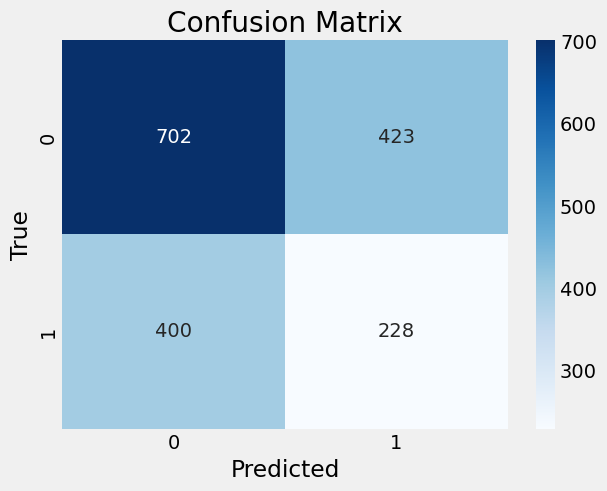

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Assuming dt_classifier is your Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # Adjust the number of folds as needed

# Training the classifier on the full training set
dt_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy(Decision Tree):", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("F1 Score(Decision Tree):", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## **SVM**

Accuracy(SVM): 0.5042783799201369
F1 Score(SVM): 0.5165313292887267
Confusion Matrix:
 [[596 554]
 [315 288]]
Cross-Validation Scores: [0.5085592  0.52425107 0.5192582  0.51640514 0.5064194 ]
Mean CV Accuracy: 0.51


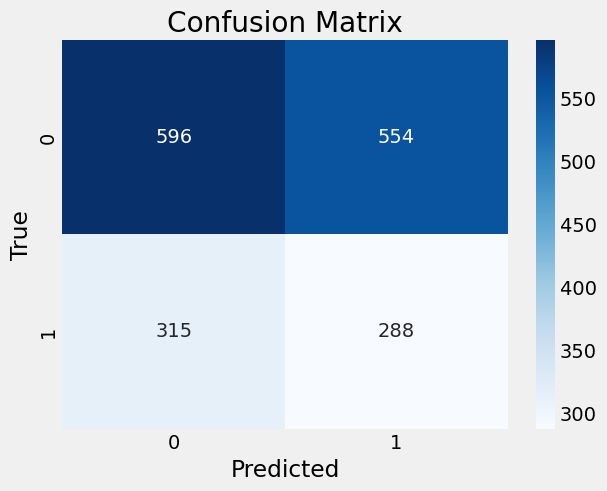

In [35]:


from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your dataset X and labels Y
# Shuffle the data
X, Y = shuffle(X, Y, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the full training set
svm_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy(SVM):", accuracy)
print("F1 Score(SVM):", f1)
print("Confusion Matrix:\n", conf_matrix)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}".format(cv_scores.mean()))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# **Conclusion**

We used supervised learning. 

For classification tasks we decided to use supervised learning methods. In our project proposal, we outlined our intention to use Neural Networks (NNs) and logistic regression. We wanted build a classification model aimed at accurately assessing heart attack risk within our dataset. Considering the large volume of data at our disposal, NNs and logistic regression seemed well-suited for this task. However, XGBoost outperformed logistic regression in our case. NNs are particularly adept at identifying complex patterns in large datasets due to their layered architecture and ability to handle numerous inputs, crucial for leveraging extensive datasets for thorough training.

We implemented the NN approach on our dataset in two phases. Initially, we confined the model to discrete and continuous variables. In the second phase, we broadened the scope to include most variables, excluding those deemed irrelevant to heart attack risk. Intriguingly, our metrics exhibited considerable variation. Generally, NNs perform better with more extensive input sets; for instance, our model's overall performance scores improved from a range of 0.79-0.82 to 0.89-0.92 when incorporating more inputs, demonstrating the model's enhanced learning capacity with richer data.

Nevertheless, an increase in data doesn't always lead to a superior model in NN implementations. In terms of the F1 score on the test set, the model with fewer variables often outperformed the one with more inputs. The scores varied from 0.71-0.74 in the first implementation to 0.70-0.73 in the second. However, the model with more variables achieved better ROC-AUC and Precision-Recall scores, indicating superior overall performance.

In our project proposal, we stated that logistic regression would be one of our primary modeling approaches. However, it did not fare well with our dataset. Conversely, XGBoost proved to be more suitable, yielding acceptable and reasonable results when evaluating the model's performance.

Regarding the other methodologies we employed, such as Decision Trees, SVM, and Random Forest, the performance ranged from moderate to insufficient. This variation could be due to the preprocessing steps specifically tailored for NNs, which might not have been as effective for these models.. Additionally, the inherent characteristics of our dataset and its dimensionality might favor the NN and XGboost approach over other algorithms.